In [1958]:
#Importing all required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [1959]:
#Reading the data file
FundRating=pd.read_csv('Rating.csv')

/Users/chai3/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (29,31,32,64,78,101,117) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [1960]:
FundRating.head(10)
#From below data, we can see that most of the values are numeric. We do have NAN values present in the data set
#Let's analyze it further

,bb_rating,us_govt_bond_rating,below_b_rating,others_rating,maturity_bond,b_rating,a_rating,aaa_rating,aa_rating,bbb_rating,...,10_years_beta_fund,10yrs_treynor_ratio_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category
0,9.15,0.0,0.10,7.31,11.36,11.13,13.04,30.89,9.90,18.48,...,1.28,2.68,0.00,0.11,3.87,0.01,0.01,0.06,0.33,3.95
1,13.09,0.0,2.13,1.83,9.46,20.01,16.67,29.57,1.47,15.23,...,NaN,NaN,0.01,0.07,0.00,0.04,0.01,0.08,NaN,8.24
2,13.09,0.0,2.13,1.83,9.46,20.01,16.67,29.57,1.47,15.23,...,NaN,NaN,0.01,0.07,0.00,0.04,0.01,0.08,NaN,8.24
3,13.09,0.0,2.13,1.83,9.46,20.01,16.67,29.57,1.47,15.23,...,NaN,NaN,0.01,0.07,0.00,0.04,0.01,0.08,NaN,8.24
4,13.09,0.0,2.13,1.83,9.46,20.01,16.67,29.57,1.47,15.23,...,NaN,NaN,0.01,0.07,0.00,0.04,0.01,0.08,NaN,8.24
5,13.09,0.0,2.13,1.83,9.46,20.01,16.67,29.57,1.47,15.23,...,NaN,NaN,0.01,0.07,0.00,0.04,0.01,0.08,NaN,8.24
6,13.09,0.0,2.13,1.83,9.46,20.01,16.67,29.57,1.47,15.23,...,NaN,NaN,0.01,0.07,0.00,0.04,0.01,0.08,NaN,8.24
7,13.09,0.0,2.13,1.83,9.46,20.01,16.67,29.57,1.47,15.23,...,NaN,NaN,0.01,0.07,0.00,0.04,0.01,0.08,NaN,8.24
8,13.09,0.0,2.13,1.83,9.46,20.01,16.67,29.57,1.47,15.23,...,NaN,NaN,0.01,0.07,0.00,0.04,0.01,0.08,NaN,8.24
9,13.09,0.0,2.13,1.83,9.46,20.01,16.67,29.57,1.47,15.23,...,NaN,NaN,0.01,0.07,0.00,0.04,0.01,0.08,NaN,8.24


In [1961]:
FundRating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 126 entries, bb_rating to 10_years_return_category
dtypes: float64(109), int64(1), object(16)
memory usage: 24.0+ MB


In [1962]:
FundRating.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bb_rating,24886.0,3.473804,8.299747,0.00,0.00,0.00,2.45,80.47
us_govt_bond_rating,24886.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
below_b_rating,24886.0,0.827525,2.700019,-0.02,0.00,0.00,0.10,42.30
others_rating,24886.0,1.666769,6.885158,-68.21,0.00,0.00,0.33,100.00
maturity_bond,8093.0,7.765444,4.148558,0.00,5.46,7.29,8.92,29.30
...,...,...,...,...,...,...,...,...
10_years_alpha_category,24894.0,0.001136,0.027795,-0.11,-0.02,0.00,0.01,0.10
10_years_beta_category,24894.0,0.009076,0.005493,-0.02,0.01,0.01,0.01,0.12
10years_category_std,24894.0,0.109399,0.055202,0.00,0.06,0.12,0.15,0.34
10_years_return_mean_annual_fund,16416.0,0.858579,0.458993,-3.64,0.53,0.90,1.20,3.28


In [1963]:
FundRating=FundRating.replace(",", "",regex=True)
FundRating=FundRating.replace(">", "",regex=True)
FundRating=FundRating.replace("<","",regex=True)

In [1914]:
# FundRating['mmc']=(FundRating['mmc']).str.replace(',','')
# FundRating['ps_ratio']=(FundRating['ps_ratio']).str.replace(',','')
# FundRating['pc_ratio']=(FundRating['pc_ratio']).str.replace(',','')
# FundRating['pe_ratio']=(FundRating['pe_ratio']).str.replace(',','')
# FundRating['ps_ratio.1']=(FundRating['ps_ratio.1']).str.replace(',','')
# #FundRating['return_ytd']=(FundRating['return_ytd']).str.replace(',','')
# #FundRating['10yrs_treynor_ratio_fund']=(FundRating['10yrs_treynor_ratio_fund']).str.replace(',','')
# FundRating['5yrs_treynor_ratio_fund']=(FundRating['5yrs_treynor_ratio_fund']).str.replace(',','')
# #FundRating['5_years_alpha_fund']=(FundRating['5_years_alpha_fund']).str.replace(',','')
# FundRating['3yrs_treynor_ratio_fund']=(FundRating['3yrs_treynor_ratio_fund']).str.replace(',','')

# #'mmc','ps_ratio','pc_ratio','pe_ratio','ps_ratio.1','5yrs_treynor_ratio_fund','3yrs_treynor_ratio_fund'


# FundRating['mmc']=FundRating['mmc'].astype(float)
# FundRating['ps_ratio']=FundRating['ps_ratio'].astype(float)
# FundRating['pc_ratio']=FundRating['pc_ratio'].astype(float)
# FundRating['pe_ratio']=FundRating['pe_ratio'].astype(float)
# FundRating['ps_ratio.1']=FundRating['ps_ratio.1'].astype(float)
# #FundRating['return_ytd']=FundRating['return_ytd'].astype(float)
# #FundRating['10yrs_treynor_ratio_fund']=FundRating['10yrs_treynor_ratio_fund'].astype(float)
# FundRating['5yrs_treynor_ratio_fund']=FundRating['5yrs_treynor_ratio_fund'].astype(float)
# #FundRating['5_years_alpha_fund']=FundRating['5_years_alpha_fund'].astype(float)
# FundRating['3yrs_treynor_ratio_fund']=FundRating['3yrs_treynor_ratio_fund'].astype(float)

In [1915]:
FundRating.describe().transpose()
#Inference: From below data we can conclude that outlier values  and negetive values are present in data set.

,count,mean,std,min,25%,50%,75%,max
bb_rating,24886.0,3.473804,8.299747,0.00,0.00,0.00,2.45,80.47
us_govt_bond_rating,24886.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
below_b_rating,24886.0,0.827525,2.700019,-0.02,0.00,0.00,0.10,42.30
others_rating,24886.0,1.666769,6.885158,-68.21,0.00,0.00,0.33,100.00
maturity_bond,8093.0,7.765444,4.148558,0.00,5.46,7.29,8.92,29.30
...,...,...,...,...,...,...,...,...
10_years_alpha_category,24894.0,0.001136,0.027795,-0.11,-0.02,0.00,0.01,0.10
10_years_beta_category,24894.0,0.009076,0.005493,-0.02,0.01,0.01,0.01,0.12
10years_category_std,24894.0,0.109399,0.055202,0.00,0.06,0.12,0.15,0.34
10_years_return_mean_annual_fund,16416.0,0.858579,0.458993,-3.64,0.53,0.90,1.20,3.28


In [1916]:
#Taking variables one bye one and proceeding with required data treatments in below steps.
# Also we will perform univariate/bivariate (independent variable/dependent variable) analysis to understand the 
#each attributes and choose carefully which all attributes have to be a part of the analysis and why

In [1917]:
#FundRating['mmc'].fillna(('17479.77'), inplace=True)

In [1918]:
# import numpy as np
# FundRating["pb_ratio"]=np.where(FundRating["pb_ratio"]>(5.085), (5.085), FundRating["pb_ratio"])
# FundRating["pb_ratio"]=np.where(FundRating["pb_ratio"]<(-2.155), (-2.155), FundRating["pb_ratio"])

# FundRating["fund_ratio_net_annual_expense"]=np.where(FundRating["fund_ratio_net_annual_expense"]>(2.52), (2.52), FundRating["fund_ratio_net_annual_expense"])
# FundRating["fund_ratio_net_annual_expense"]=np.where(FundRating["fund_ratio_net_annual_expense"]<(-0.3600), (-0.3600), FundRating["fund_ratio_net_annual_expense"])

# FundRating["portfolio_cyclical_consumer_allocation"]=np.where(FundRating["portfolio_cyclical_consumer_allocation"]>(33.0), (33.0), FundRating["portfolio_cyclical_consumer_allocation"])
# FundRating["portfolio_cyclical_consumer_allocation"]=np.where(FundRating["portfolio_cyclical_consumer_allocation"]<(-19.799), (-19.799), FundRating["portfolio_cyclical_consumer_allocation"])

# FundRating["portfolio_utils_allocation"]=np.where(FundRating["portfolio_utils_allocation"]>(8.35), (8.35), FundRating["portfolio_utils_allocation"])
# FundRating["portfolio_utils_allocation"]=np.where(FundRating["portfolio_utils_allocation"]<(-5.01), (-5.01), FundRating["portfolio_utils_allocation"])

# FundRating["portfolio_property_allocation"]=np.where(FundRating["portfolio_property_allocation"]>(11.08125), (11.08125), FundRating["portfolio_property_allocation"])
# FundRating["portfolio_property_allocation"]=np.where(FundRating["portfolio_property_allocation"]<(-6.6487), (-6.6487), FundRating["portfolio_property_allocation"])

# FundRating["portfolio_healthcare_allocation"]=np.where(FundRating["portfolio_healthcare_allocation"]>(33.875), (33.875), FundRating["portfolio_healthcare_allocation"])
# FundRating["portfolio_healthcare_allocation"]=np.where(FundRating["portfolio_healthcare_allocation"]<(-20.3250), (-20.3250), FundRating["portfolio_healthcare_allocation"])

# FundRating["portfolio_consumer_defence_allocation"]=np.where(FundRating["portfolio_consumer_defence_allocation"]>(19.675), (19.675), FundRating["portfolio_consumer_defence_allocation"])
# FundRating["portfolio_consumer_defence_allocation"]=np.where(FundRating["portfolio_consumer_defence_allocation"]<(-11.805), (-11.805), FundRating["portfolio_consumer_defence_allocation"])

# FundRating["portfolio_energy_allocation"]=np.where(FundRating["portfolio_energy_allocation"]>(15.5562), (15.5562), FundRating["portfolio_energy_allocation"])
# FundRating["portfolio_energy_allocation"]=np.where(FundRating["portfolio_energy_allocation"]<(-9.3337), (-9.3337), FundRating["portfolio_energy_allocation"])

# FundRating["portfolio_materials_basic_allocation"]=np.where(FundRating["portfolio_materials_basic_allocation"]>(12.625), (12.625), FundRating["portfolio_materials_basic_allocation"])
# FundRating["portfolio_materials_basic_allocation"]=np.where(FundRating["portfolio_materials_basic_allocation"]<(-7.5749), (-7.5749), FundRating["portfolio_materials_basic_allocation"])

# FundRating["portfolio_tech_allocation"]=np.where(FundRating["portfolio_tech_allocation"]>(48.97499), (48.97499), FundRating["portfolio_tech_allocation"])
# FundRating["portfolio_tech_allocation"]=np.where(FundRating["portfolio_tech_allocation"]<(-29.3849), (-29.3849), FundRating["portfolio_tech_allocation"])

# FundRating["portfolio_industrials_allocation"]=np.where(FundRating["portfolio_industrials_allocation"]>(31.825), (31.825), FundRating["portfolio_industrials_allocation"])
# FundRating["portfolio_industrials_allocation"]=np.where(FundRating["portfolio_industrials_allocation"]<(-19.095), (-19.095), FundRating["portfolio_industrials_allocation"])

# FundRating["portfolio_financial_services"]=np.where(FundRating["portfolio_financial_services"]>(44.75), (44.75), FundRating["portfolio_financial_services"])
# FundRating["portfolio_financial_services"]=np.where(FundRating["portfolio_financial_services"]<(-26.8499), (-26.8499), FundRating["portfolio_financial_services"])

# FundRating["portfolio_communication_allocation"]=np.where(FundRating["portfolio_communication_allocation"]>(8.5), (8.5), FundRating["portfolio_communication_allocation"])
# FundRating["portfolio_communication_allocation"]=np.where(FundRating["portfolio_communication_allocation"]<(-5.1), (-5.1), FundRating["portfolio_communication_allocation"])
    
# FundRating["duration_bond"]=np.where(FundRating["duration_bond"]>(4.8), (4.8), FundRating["duration_bond"])
# FundRating["duration_bond"]=np.where(FundRating["duration_bond"]<(4.8), (4.8), FundRating["duration_bond"])

# FundRating["bbb_rating"]=np.where(FundRating["bbb_rating"]>(28.3499), (28.3499), FundRating["bbb_rating"])
# FundRating["bbb_rating"]=np.where(FundRating["bbb_rating"]<(-17.009), (-17.009), FundRating["bbb_rating"])

# FundRating["aa_rating"]=np.where(FundRating["aa_rating"]>(7.4750), (7.4750), FundRating["aa_rating"])
# FundRating["aa_rating"]=np.where(FundRating["aa_rating"]<(-4.485), (-4.485), FundRating["aa_rating"])

# FundRating["aaa_rating"]=np.where(FundRating["aaa_rating"]>(46.0500), (46.0500), FundRating["aaa_rating"])
# FundRating["aaa_rating"]=np.where(FundRating["aaa_rating"]<(-27.6300), (-27.6300), FundRating["aaa_rating"])

# FundRating["a_rating"]=np.where(FundRating["a_rating"]>(20.6937), (20.6937), FundRating["a_rating"])
# FundRating["a_rating"]=np.where(FundRating["a_rating"]<(-12.4162), (-12.4162), FundRating["a_rating"])

# FundRating["maturity_bond"]=np.where(FundRating["maturity_bond"]>(7.29), (7.29), FundRating["maturity_bond"])
# FundRating["maturity_bond"]=np.where(FundRating["maturity_bond"]<(7.29), (7.29), FundRating["maturity_bond"])

# FundRating["others_rating"]=np.where(FundRating["others_rating"]>(0.8), (0.8), FundRating["others_rating"])
# FundRating["others_rating"]=np.where(FundRating["others_rating"]<(-0.48), (-0.48), FundRating["others_rating"])

# FundRating["2013_return_fund"]=np.where(FundRating["2013_return_fund"]>(47.7037), (47.7037), FundRating["2013_return_fund"])
# FundRating["2013_return_fund"]=np.where(FundRating["2013_return_fund"]<(-13.1862), (-13.1862), FundRating["2013_return_fund"])

# FundRating["fund_return_3months"]=np.where(FundRating["fund_return_3months"]>(26.2000), (26.2000), FundRating["fund_return_3months"])
# FundRating["fund_return_3months"]=np.where(FundRating["fund_return_3months"]<(-9.0), (-9.0), FundRating["fund_return_3months"])

# FundRating["ytd_return_category"]=np.where(FundRating["ytd_return_category"]>(24.82), (24.82), FundRating["ytd_return_category"])
# FundRating["ytd_return_category"]=np.where(FundRating["ytd_return_category"]<(-6.8599), (-6.8599), FundRating["ytd_return_category"])

# FundRating["2017_category_return"]=np.where(FundRating["2017_category_return"]>(44.045), (44.045), FundRating["2017_category_return"])
# FundRating["2017_category_return"]=np.where(FundRating["2017_category_return"]<(-16.0750), (-16.0750), FundRating["2017_category_return"])

# FundRating["1_year_return_fund"]=np.where(FundRating["1_year_return_fund"]>(12.795), (12.795), FundRating["1_year_return_fund"])
# FundRating["1_year_return_fund"]=np.where(FundRating["1_year_return_fund"]<(-7.7250), (-7.7250), FundRating["1_year_return_fund"])

# FundRating["2015_return_fund"]=np.where(FundRating["2015_return_fund"]>(4.79), (4.79), FundRating["2015_return_fund"])
# FundRating["2015_return_fund"]=np.where(FundRating["2015_return_fund"]<(-7.21), (-7.21), FundRating["2015_return_fund"])

# FundRating["portfolio_convertable"]=np.where(FundRating["portfolio_convertable"]>(0.1750), (0.1750), FundRating["portfolio_convertable"])
# FundRating["portfolio_convertable"]=np.where(FundRating["portfolio_convertable"]<(-0.1050), (-0.1050), FundRating["portfolio_convertable"])

# FundRating["3_months_return_category"]=np.where(FundRating["3_months_return_category"]>(24.82), (24.82), FundRating["3_months_return_category"])
# FundRating["3_months_return_category"]=np.where(FundRating["3_months_return_category"]<(-6.8599), (-6.8599), FundRating["3_months_return_category"])

# FundRating["portfolio_others"]=np.where(FundRating["portfolio_others"]>(0.7000), (0.7000), FundRating["portfolio_others"])
# FundRating["portfolio_others"]=np.where(FundRating["portfolio_others"]<(-0.4200), (-0.4200), FundRating["portfolio_others"])

# FundRating["2016_return_fund"]=np.where(FundRating["2016_return_fund"]>(19.7200), (19.7200), FundRating["2016_return_fund"])
# FundRating["2016_return_fund"]=np.where(FundRating["2016_return_fund"]<(-7.160), (-7.160), FundRating["2016_return_fund"])

# FundRating["stock_percent_of_portfolio"]=np.where(FundRating["stock_percent_of_portfolio"]>(243.11), (243.11), FundRating["stock_percent_of_portfolio"])
# FundRating["stock_percent_of_portfolio"]=np.where(FundRating["stock_percent_of_portfolio"]<(-144.95), (-144.95), FundRating["stock_percent_of_portfolio"])

# FundRating["2016_return_category"]=np.where(FundRating["2016_return_category"]>(18.28), (18.28), FundRating["2016_return_category"])
# FundRating["2016_return_category"]=np.where(FundRating["2016_return_category"]<(-5.7999), (-5.7999), FundRating["2016_return_category"])

# FundRating["2011_return_fund"]=np.where(FundRating["2011_return_fund"]>(2.945), (2.945), FundRating["2011_return_fund"])
# FundRating["2011_return_fund"]=np.where(FundRating["2011_return_fund"]<(-4.055), (-4.055), FundRating["2011_return_fund"])

# FundRating["2010_return_fund"]=np.where(FundRating["2010_return_fund"]>(13.5962), (13.5962), FundRating["2010_return_fund"])
# FundRating["2010_return_fund"]=np.where(FundRating["2010_return_fund"]<(12.6), (12.6), FundRating["2010_return_fund"])

# FundRating["fund_return_3years"]=np.where(FundRating["fund_return_3years"]>(21.2299), (21.2299), FundRating["fund_return_3years"])
# FundRating["fund_return_3years"]=np.where(FundRating["fund_return_3years"]<(-8.2099), (-8.2099), FundRating["fund_return_3years"])

# FundRating["2012_fund_return"]=np.where(FundRating["2012_fund_return"]>(18.4049), (18.4049), FundRating["2012_fund_return"])
# FundRating["2012_fund_return"]=np.where(FundRating["2012_fund_return"]<(8.5250), (8.5250), FundRating["2012_fund_return"])

# FundRating["2018_return_fund"]=np.where(FundRating["2018_return_fund"]>(10.73), (10.73), FundRating["2018_return_fund"])
# FundRating["2018_return_fund"]=np.where(FundRating["2018_return_fund"]<(-22.79), (-22.79), FundRating["2018_return_fund"])

# FundRating["2017_return_fund"]=np.where(FundRating["2017_return_fund"]>(42.2237), (42.2237), FundRating["2017_return_fund"])
# FundRating["2017_return_fund"]=np.where(FundRating["2017_return_fund"]<(-14.1062), (-14.1062), FundRating["2017_return_fund"])

# FundRating["category_ratio_net_annual_expense"]=np.where(FundRating["category_ratio_net_annual_expense"]>(1.7349), (1.7349), FundRating["category_ratio_net_annual_expense"])
# FundRating["category_ratio_net_annual_expense"]=np.where(FundRating["category_ratio_net_annual_expense"]<(0.2550), (0.2550), FundRating["category_ratio_net_annual_expense"])

# FundRating["category_return_2015"]=np.where(FundRating["category_return_2015"]>(1.4950), (1.4950), FundRating["category_return_2015"])
# FundRating["category_return_2015"]=np.where(FundRating["category_return_2015"]<(-5.025), (-5.025), FundRating["category_return_2015"])

# FundRating["1_month_fund_return"]=np.where(FundRating["1_month_fund_return"]>(3.75), (3.75), FundRating["1_month_fund_return"])
# FundRating["1_month_fund_return"]=np.where(FundRating["1_month_fund_return"]<(-1.69), (-1.69), FundRating["1_month_fund_return"])

# FundRating["bond_percentage_of_porfolio"]=np.where(FundRating["bond_percentage_of_porfolio"]>(159.25), (159.25), FundRating["bond_percentage_of_porfolio"])
# FundRating["bond_percentage_of_porfolio"]=np.where(FundRating["bond_percentage_of_porfolio"]<(-95.5500), (-95.5500), FundRating["bond_percentage_of_porfolio"])

# FundRating["portfolio_preferred"]=np.where(FundRating["portfolio_preferred"]>(0.025), (0.025), FundRating["portfolio_preferred"])
# FundRating["portfolio_preferred"]=np.where(FundRating["portfolio_preferred"]<(-0.015), (-0.015), FundRating["portfolio_preferred"])

# FundRating["2010_return_category"]=np.where(FundRating["2010_return_category"]>(14.115), (14.115), FundRating["2010_return_category"])
# FundRating["2010_return_category"]=np.where(FundRating["2010_return_category"]<(13.115), (13.115), FundRating["2010_return_category"])

# FundRating["2013_category_return"]=np.where(FundRating["2013_category_return"]>(52.13), (52.13), FundRating["2013_category_return"])
# FundRating["2013_category_return"]=np.where(FundRating["2013_category_return"]<(-19.71), (-19.71), FundRating["2013_category_return"])

# FundRating["3_years_alpha_fund"]=np.where(FundRating["3_years_alpha_fund"]>(4.6599), (4.6599), FundRating["3_years_alpha_fund"])
# FundRating["3_years_alpha_fund"]=np.where(FundRating["3_years_alpha_fund"]<(-5.8999), (-5.8999), FundRating["3_years_alpha_fund"])

# FundRating["3years_category_std"]=np.where(FundRating["3years_category_std"]>(0.265), (0.265), FundRating["3years_category_std"])
# FundRating["3years_category_std"]=np.where(FundRating["3years_category_std"]<(-0.095), (-0.095), FundRating["3years_category_std"])

# FundRating["3yrs_sharpe_ratio_fund"]=np.where(FundRating["3yrs_sharpe_ratio_fund"]>(1.6849), (1.6849), FundRating["3yrs_sharpe_ratio_fund"])
# FundRating["3yrs_sharpe_ratio_fund"]=np.where(FundRating["3yrs_sharpe_ratio_fund"]<(-0.2749), (-0.2749), FundRating["3yrs_sharpe_ratio_fund"])

# FundRating["3yrs_treynor_ratio_category"]=np.where(FundRating["3yrs_treynor_ratio_category"]>(0.1750), (0.1750), FundRating["3yrs_treynor_ratio_category"])
# FundRating["3yrs_treynor_ratio_category"]=np.where(FundRating["3yrs_treynor_ratio_category"]<(-0.0250), (-0.0250), FundRating["3yrs_treynor_ratio_category"])

# FundRating["3_years_return_mean_annual_fund"]=np.where(FundRating["3_years_return_mean_annual_fund"]>(1.635), (1.635), FundRating["3_years_return_mean_annual_fund"])
# FundRating["3_years_return_mean_annual_fund"]=np.where(FundRating["3_years_return_mean_annual_fund"]<(-0.405), (-0.405), FundRating["3_years_return_mean_annual_fund"])

# FundRating["fund_beta_3years"]=np.where(FundRating["fund_beta_3years"]>(1.6150), (1.6150), FundRating["fund_beta_3years"])
# FundRating["fund_beta_3years"]=np.where(FundRating["fund_beta_3years"]<(0.3), (0.3), FundRating["fund_beta_3years"])

# FundRating["3years_fund_r_squared"]=np.where(FundRating["3years_fund_r_squared"]>(131.43), (131.43), FundRating["3years_fund_r_squared"])
# FundRating["3years_fund_r_squared"]=np.where(FundRating["3years_fund_r_squared"]<(26.55), (26.55), FundRating["3years_fund_r_squared"])

# FundRating["3years_fund_std"]=np.where(FundRating["3years_fund_std"]>(23.68), (23.68), FundRating["3years_fund_std"])
# FundRating["3years_fund_std"]=np.where(FundRating["3years_fund_std"]<(-6.9599), (-6.9599), FundRating["3years_fund_std"])

# FundRating["category_beta_3years"]=np.where(FundRating["category_beta_3years"]>(0.01), (0.01), FundRating["category_beta_3years"])
# FundRating["category_beta_3years"]=np.where(FundRating["category_beta_3years"]<(0.01), (0.01), FundRating["category_beta_3years"])

# FundRating["fund_return_3years"]=np.where(FundRating["fund_return_3years"]>(21.2299), (21.2299), FundRating["fund_return_3years"])
# FundRating["fund_return_3years"]=np.where(FundRating["fund_return_3years"]<(-8.2099), (-8.2099), FundRating["fund_return_3years"])

# FundRating["3_years_alpha_category"]=np.where(FundRating["3_years_alpha_category"]>(0.015), (0.015), FundRating["3_years_alpha_category"])
# FundRating["3_years_alpha_category"]=np.where(FundRating["3_years_alpha_category"]<(-0.025), (-0.025), FundRating["3_years_alpha_category"])

# FundRating["3_years_return_mean_annual_category"]=np.where(FundRating["3_years_return_mean_annual_category"]>(0.025), (0.025), FundRating["3_years_return_mean_annual_category"])
# FundRating["3_years_return_mean_annual_category"]=np.where(FundRating["3_years_return_mean_annual_category"]<(-0.015), (-0.015), FundRating["3_years_return_mean_annual_category"])

# FundRating["3yrs_sharpe_ratio_category"]=np.where(FundRating["3yrs_sharpe_ratio_category"]>(0.025), (0.025), FundRating["3yrs_sharpe_ratio_category"])
# FundRating["3yrs_sharpe_ratio_category"]=np.where(FundRating["3yrs_sharpe_ratio_category"]<(-0.015), (-0.015), FundRating["3yrs_sharpe_ratio_category"])

# FundRating["3years_category_r_squared"]=np.where(FundRating["3years_category_r_squared"]>(1.28), (1.28), FundRating["3years_category_r_squared"])
# FundRating["3years_category_r_squared"]=np.where(FundRating["3years_category_r_squared"]<(0.24), (0.24), FundRating["3years_category_r_squared"])

# FundRating["3_years_return_category"]=np.where(FundRating["3_years_return_category"]>(18.485), (18.485), FundRating["3_years_return_category"])
# FundRating["3_years_return_category"]=np.where(FundRating["3_years_return_category"]<(-4.1149), (-4.1149), FundRating["3_years_return_category"])

# FundRating["category_r_squared_5years"]=np.where(FundRating["category_r_squared_5years"]>(1.2650), (1.2650), FundRating["category_r_squared_5years"])
# FundRating["category_r_squared_5years"]=np.where(FundRating["category_r_squared_5years"]<(0.265), (0.265), FundRating["category_r_squared_5years"])

# FundRating["5yrs_sharpe_ratio_fund"]=np.where(FundRating["5yrs_sharpe_ratio_fund"]>(1.1549), (1.1549), FundRating["5yrs_sharpe_ratio_fund"])
# FundRating["5yrs_sharpe_ratio_fund"]=np.where(FundRating["5yrs_sharpe_ratio_fund"]<(-0.08499), (-0.08499), FundRating["5yrs_sharpe_ratio_fund"])

# FundRating["5years_fund_r_squared"]=np.where(FundRating["5years_fund_r_squared"]>(125.6749), (125.6749), FundRating["5years_fund_r_squared"])
# FundRating["5years_fund_r_squared"]=np.where(FundRating["5years_fund_r_squared"]<(33.475), (33.475), FundRating["5years_fund_r_squared"])

# FundRating["5years_fund_std"]=np.where(FundRating["5years_fund_std"]>(22.4837), (22.4837), FundRating["5years_fund_std"])
# FundRating["5years_fund_std"]=np.where(FundRating["5years_fund_std"]<(-4.5662), (-4.5662), FundRating["5years_fund_std"])

# FundRating["5yrs_sharpe_ratio_category"]=np.where(FundRating["5yrs_sharpe_ratio_category"]>(0.025), (0.025), FundRating["5yrs_sharpe_ratio_category"])
# FundRating["5yrs_sharpe_ratio_category"]=np.where(FundRating["5yrs_sharpe_ratio_category"]<(-0.015), (-0.015), FundRating["5yrs_sharpe_ratio_category"])

# FundRating["5_years_alpha_fund"]=np.where(FundRating["5_years_alpha_fund"]>(3.560), (3.560), FundRating["5_years_alpha_fund"])
# FundRating["5_years_alpha_fund"]=np.where(FundRating["5_years_alpha_fund"]<(-4.84), (-4.84), FundRating["5_years_alpha_fund"])

# FundRating["5_years_beta_fund"]=np.where(FundRating["5_years_beta_fund"]>(1.4150), (1.4150), FundRating["5_years_beta_fund"])
# FundRating["5_years_beta_fund"]=np.where(FundRating["5_years_beta_fund"]<(0.5), (0.5), FundRating["5_years_beta_fund"])

# FundRating["5_years_return_mean_annual_fund"]=np.where(FundRating["5_years_return_mean_annual_fund"]>(1.0599), (1.0599), FundRating["5_years_return_mean_annual_fund"])
# FundRating["5_years_return_mean_annual_fund"]=np.where(FundRating["5_years_return_mean_annual_fund"]<(-0.2199), (-0.2199), FundRating["5_years_return_mean_annual_fund"])

# FundRating["5_years_return_mean_annual_category"]=np.where(FundRating["5_years_return_mean_annual_category"]>(0.025), (0.025), FundRating["5_years_return_mean_annual_category"])
# FundRating["5_years_return_mean_annual_category"]=np.where(FundRating["5_years_return_mean_annual_category"]<(-0.015), (-0.015), FundRating["5_years_return_mean_annual_category"])

# FundRating["5yrs_treynor_ratio_category"]=np.where(FundRating["5yrs_treynor_ratio_category"]>(0.12), (0.12), FundRating["5yrs_treynor_ratio_category"])
# FundRating["5yrs_treynor_ratio_category"]=np.where(FundRating["5yrs_treynor_ratio_category"]<(-0.0399), (-0.0399), FundRating["5yrs_treynor_ratio_category"])

# FundRating["5_years_return_fund"]=np.where(FundRating["5_years_return_fund"]>(14.375), (14.375), FundRating["5_years_return_fund"])
# FundRating["5_years_return_fund"]=np.where(FundRating["5_years_return_fund"]<(-6.625), (-6.625), FundRating["5_years_return_fund"])

# FundRating["5_years_alpha_category"]=np.where(FundRating["5_years_alpha_category"]>(0.03), (0.03), FundRating["5_years_alpha_category"])
# FundRating["5_years_alpha_category"]=np.where(FundRating["5_years_alpha_category"]<(-0.05), (-0.05), FundRating["5_years_alpha_category"])

# FundRating["5_years_beta_category"]=np.where(FundRating["5_years_beta_category"]>(0.01), (0.01), FundRating["5_years_beta_category"])
# FundRating["5_years_beta_category"]=np.where(FundRating["5_years_beta_category"]<(0.01), (0.01), FundRating["5_years_beta_category"])

# FundRating["5years_category_std"]=np.where(FundRating["5years_category_std"]>(0.25), (0.25), FundRating["5years_category_std"])
# FundRating["5years_category_std"]=np.where(FundRating["5years_category_std"]<(-0.0699), (-0.0699), FundRating["5years_category_std"])

# FundRating["10years_fund_r_squared"]=np.where(FundRating["10years_fund_r_squared"]>(105.2350), (105.2350), FundRating["10years_fund_r_squared"])
# FundRating["10years_fund_r_squared"]=np.where(FundRating["10years_fund_r_squared"]<(66), (66), FundRating["10years_fund_r_squared"])

# FundRating["10yrs_sharpe_ratio_fund"]=np.where(FundRating["10yrs_sharpe_ratio_fund"]>(1.225), (1.225), FundRating["10yrs_sharpe_ratio_fund"])
# FundRating["10yrs_sharpe_ratio_fund"]=np.where(FundRating["10yrs_sharpe_ratio_fund"]<(0.7050), (0.7050), FundRating["10yrs_sharpe_ratio_fund"])

# FundRating["10_years_alpha_fund"]=np.where(FundRating["10_years_alpha_fund"]>(2.085), (2.085), FundRating["10_years_alpha_fund"])
# FundRating["10_years_alpha_fund"]=np.where(FundRating["10_years_alpha_fund"]<(-2.675), (-2.675), FundRating["10_years_alpha_fund"])

# FundRating["10years_fund_std"]=np.where(FundRating["10years_fund_std"]>(20.6299), (20.6299), FundRating["10years_fund_std"])
# FundRating["10years_fund_std"]=np.where(FundRating["10years_fund_std"]<(3.2), (3.2), FundRating["10years_fund_std"])

# FundRating["10yrs_sharpe_ratio_category"]=np.where(FundRating["10yrs_sharpe_ratio_category"]>(0.01), (0.01), FundRating["10yrs_sharpe_ratio_category"])
# FundRating["10yrs_sharpe_ratio_category"]=np.where(FundRating["10yrs_sharpe_ratio_category"]<(0.01), (0.01), FundRating["10yrs_sharpe_ratio_category"])

# FundRating["10_years_beta_fund"]=np.where(FundRating["10_years_beta_fund"]>(1.210), (1.210), FundRating["10_years_beta_fund"])
# FundRating["10_years_beta_fund"]=np.where(FundRating["10_years_beta_fund"]<(0.8099), (0.8099), FundRating["10_years_beta_fund"])

# FundRating["10_years_return_mean_annual_category"]=np.where(FundRating["10_years_return_mean_annual_category"]>(0.01), (0.01), FundRating["10_years_return_mean_annual_category"])
# FundRating["10_years_return_mean_annual_category"]=np.where(FundRating["10_years_return_mean_annual_category"]<(0.01), (0.01), FundRating["10_years_return_mean_annual_category"])

# FundRating["10yrs_treynor_ratio_category"]=np.where(FundRating["10yrs_treynor_ratio_category"]>(0.2450), (0.2450), FundRating["10yrs_treynor_ratio_category"])
# FundRating["10yrs_treynor_ratio_category"]=np.where(FundRating["10yrs_treynor_ratio_category"]<(-0.035), (-0.035), FundRating["10yrs_treynor_ratio_category"])

# FundRating["10_years_return_fund"]=np.where(FundRating["10_years_return_fund"]>(30.9), (30.9), FundRating["10_years_return_fund"])
# FundRating["10_years_return_fund"]=np.where(FundRating["10_years_return_fund"]<(-18.54), (-18.54), FundRating["10_years_return_fund"])

# FundRating["10_years_alpha_category"]=np.where(FundRating["10_years_alpha_category"]>(0.055), (0.055), FundRating["10_years_alpha_category"])
# FundRating["10_years_alpha_category"]=np.where(FundRating["10_years_alpha_category"]<(-0.065), (-0.065), FundRating["10_years_alpha_category"])


# FundRating["10_years_beta_category"]=np.where(FundRating["10_years_beta_category"]>(0.01), (0.01), FundRating["10_years_beta_category"])
# FundRating["10_years_beta_category"]=np.where(FundRating["10_years_beta_category"]<(0.01), (0.01), FundRating["10_years_beta_category"])

# FundRating["10years_category_std"]=np.where(FundRating["10years_category_std"]>(0.2850), (0.2850), FundRating["10years_category_std"])
# FundRating["10years_category_std"]=np.where(FundRating["10years_category_std"]<(-0.0750), (-0.0750), FundRating["10years_category_std"])

# FundRating["10_years_return_mean_annual_fund"]=np.where(FundRating["10_years_return_mean_annual_fund"]>(1.5250), (1.5250), FundRating["10_years_return_mean_annual_fund"])
# FundRating["10_years_return_mean_annual_fund"]=np.where(FundRating["10_years_return_mean_annual_fund"]<(0.29), (0.29), FundRating["10_years_return_mean_annual_fund"])

# FundRating["10_years_return_category"]=np.where(FundRating["10_years_return_category"]>(25.6399), (25.6399), FundRating["10_years_return_category"])
# FundRating["10_years_return_category"]=np.where(FundRating["10_years_return_category"]<(-5.0799), (-5.0799), FundRating["10_years_return_category"])

# FundRating["fund_return_3years.1"]=np.where(FundRating["fund_return_3years.1"]>(21.2299), (21.2299), FundRating["fund_return_3years.1"])
# FundRating["fund_return_3years.1"]=np.where(FundRating["fund_return_3years.1"]<(-8.2099), (-8.2099), FundRating["fund_return_3years.1"])

# FundRating["10years_category_r_squared"]=np.where(FundRating["10years_category_r_squared"]>(1.235), (1.235), FundRating["10years_category_r_squared"])
# FundRating["10years_category_r_squared"]=np.where(FundRating["10years_category_r_squared"]<(0.4), (0.4), FundRating["10years_category_r_squared"])

# FundRating["category_return_1month"]=np.where(FundRating["category_return_1month"]>(2.76), (2.76), FundRating["category_return_1month"])
# FundRating["category_return_1month"]=np.where(FundRating["category_return_1month"]<(-0.9199), (-0.9199), FundRating["category_return_1month"])

# FundRating["2014_return_fund"]=np.where(FundRating["2014_return_fund"]>(12.645), (12.645), FundRating["2014_return_fund"])
# FundRating["2014_return_fund"]=np.where(FundRating["2014_return_fund"]<(-2.275), (-2.275), FundRating["2014_return_fund"])

# FundRating["years_down"]=np.where(FundRating["years_down"]>(7.0), (7.0), FundRating["years_down"])
# FundRating["years_down"]=np.where(FundRating["years_down"]<(-1.0), (-1.0), FundRating["years_down"])


# FundRating["ytd_return_fund"]=np.where(FundRating["ytd_return_fund"]>(25.93), (25.93), FundRating["ytd_return_fund"])
# FundRating["ytd_return_fund"]=np.where(FundRating["ytd_return_fund"]<(-8.39), (-8.39), FundRating["ytd_return_fund"])

# FundRating["2011_return_category"]=np.where(FundRating["2011_return_category"]>(1.815), (1.815), FundRating["2011_return_category"])
# FundRating["2011_return_category"]=np.where(FundRating["2011_return_category"]<(-5.025), (-5.025), FundRating["2011_return_category"])

# FundRating["cash_percent_of_portfolio"]=np.where(FundRating["cash_percent_of_portfolio"]>(15.715), (15.715), FundRating["cash_percent_of_portfolio"])
# FundRating["cash_percent_of_portfolio"]=np.where(FundRating["cash_percent_of_portfolio"]<(-7.445), (-7.445), FundRating["cash_percent_of_portfolio"])

# FundRating["category_return_1year"]=np.where(FundRating["category_return_1year"]>(10.3099), (10.3099),FundRating["category_return_1year"])
# FundRating["category_return_1year"]=np.where(FundRating["category_return_1year"]<(-5.1299), (-5.1299),FundRating["category_return_1year"])

# FundRating["2018_return_category"]=np.where(FundRating["2018_return_category"]>(8.0950),(8.0950), FundRating["2018_return_category"])
# FundRating["2018_return_category"]=np.where(FundRating["2018_return_category"]<(-19.0650),(-19.0650),FundRating["2018_return_category"])

# FundRating["years_up"]=np.where(FundRating["years_up"]>(25.5), (25.5), FundRating["years_up"])
# FundRating["years_up"]=np.where(FundRating["years_up"]<(-10.5), (-10.5), FundRating["years_up"])


# FundRating["2012_return_category"]=np.where(FundRating["2012_return_category"]>(17.8550), (17.8550), FundRating["2012_return_category"])
# FundRating["2012_return_category"]=np.where(FundRating["2012_return_category"]<(10.13), (10.14), FundRating["2012_return_category"])

# FundRating["bb_rating"]=np.where(FundRating["bb_rating"]>(2.42), (6.05), FundRating["bb_rating"])
# FundRating["bb_rating"]=np.where(FundRating["bb_rating"]<(-3.63), (-3.63), FundRating["bb_rating"])

# FundRating["below_b_rating"]=np.where(FundRating["below_b_rating"]>(0.25),(0.25),FundRating["below_b_rating"])
# FundRating["below_b_rating"]=np.where(FundRating["below_b_rating"]<(-0.1500), (-0.1500), FundRating["below_b_rating"])

# FundRating["2014_category_return"]=np.where(FundRating["2014_category_return"]>(12.7399),(12.7399),FundRating["2014_category_return"])
# FundRating["2014_category_return"]=np.where(FundRating["2014_category_return"]< (-3.1799), (-3.1799), FundRating["2014_category_return"])

# FundRating["total_assets"]=np.where(FundRating["total_assets"]>(3908895000.0),(3908895000.0),FundRating["total_assets"])
# FundRating["total_assets"]=np.where(FundRating["total_assets"]<(-2194825000.0), (-2194825000.0), FundRating["total_assets"])

# FundRating["return_ytd"]=np.where(FundRating["return_ytd"]>(25.93),(25.93),FundRating['return_ytd'])
# FundRating["return_ytd"]=np.where(FundRating["return_ytd"]<(-8.39),(-8.39), FundRating['return_ytd'])

# FundRating["yield"]=np.where(FundRating["yield"]>(5.8800),(5.8800),FundRating['yield'])
# FundRating["yield"]=np.where(FundRating["yield"]<(-2.7600),(-2.7600), FundRating['yield'])

In [1919]:
# # FundRating=replace_outlier(FundRating, "bb_rating")
# df_columns = FundRating.columns
# for i in range(df_columns.size):
#     print(df_columns[i])
#     FundRating=replace_outlier(FundRating, df_columns[i])

In [1920]:
#  import numpy as np
# FundRating["pb_ratio"]=np.where(FundRating["pb_ratio"]>(4.5), FundRating["pb_ratio"].median(), FundRating["pb_ratio"])
# FundRating["pb_ratio"]=np.where(FundRating["pb_ratio"]<(-2.155), FundRating["pb_ratio"].median(), FundRating["pb_ratio"])

# FundRating["fund_ratio_net_annual_expense"]=np.where(FundRating["fund_ratio_net_annual_expense"]>(2.52), FundRating["fund_ratio_net_annual_expense"].median(), FundRating["fund_ratio_net_annual_expense"])
# FundRating["fund_ratio_net_annual_expense"]=np.where(FundRating["fund_ratio_net_annual_expense"]<(-0.3600), FundRating["fund_ratio_net_annual_expense"].median(), FundRating["fund_ratio_net_annual_expense"])

# FundRating["portfolio_cyclical_consumer_allocation"]=np.where(FundRating["portfolio_cyclical_consumer_allocation"]>(33.0), FundRating["portfolio_cyclical_consumer_allocation"].median(), FundRating["portfolio_cyclical_consumer_allocation"])
# FundRating["portfolio_cyclical_consumer_allocation"]=np.where(FundRating["portfolio_cyclical_consumer_allocation"]<(-19.799), FundRating["portfolio_cyclical_consumer_allocation"].median(), FundRating["portfolio_cyclical_consumer_allocation"])

# FundRating["portfolio_utils_allocation"]=np.where(FundRating["portfolio_utils_allocation"]>(8.35), FundRating["portfolio_utils_allocation"].median(), FundRating["portfolio_utils_allocation"])
# FundRating["portfolio_utils_allocation"]=np.where(FundRating["portfolio_utils_allocation"]<(-5.01), FundRating["portfolio_utils_allocation"].median(), FundRating["portfolio_utils_allocation"])

# FundRating["portfolio_property_allocation"]=np.where(FundRating["portfolio_property_allocation"]>(11.08125), FundRating["portfolio_property_allocation"].median(), FundRating["portfolio_property_allocation"])
# FundRating["portfolio_property_allocation"]=np.where(FundRating["portfolio_property_allocation"]<(-6.6487), FundRating["portfolio_property_allocation"].median(), FundRating["portfolio_property_allocation"])

# FundRating["portfolio_healthcare_allocation"]=np.where(FundRating["portfolio_healthcare_allocation"]>(33.875), FundRating["portfolio_healthcare_allocation"].median(), FundRating["portfolio_healthcare_allocation"])
# FundRating["portfolio_healthcare_allocation"]=np.where(FundRating["portfolio_healthcare_allocation"]<(-20.3250), FundRating["portfolio_healthcare_allocation"].median(), FundRating["portfolio_healthcare_allocation"])

# FundRating["portfolio_consumer_defence_allocation"]=np.where(FundRating["portfolio_consumer_defence_allocation"]>(19.675), FundRating["portfolio_consumer_defence_allocation"].median(), FundRating["portfolio_consumer_defence_allocation"])
# FundRating["portfolio_consumer_defence_allocation"]=np.where(FundRating["portfolio_consumer_defence_allocation"]<(-11.805), FundRating["portfolio_consumer_defence_allocation"].median(), FundRating["portfolio_consumer_defence_allocation"])

# FundRating["portfolio_energy_allocation"]=np.where(FundRating["portfolio_energy_allocation"]>(15.5562), FundRating["portfolio_energy_allocation"].median(), FundRating["portfolio_energy_allocation"])
# FundRating["portfolio_energy_allocation"]=np.where(FundRating["portfolio_energy_allocation"]<(-9.3337), FundRating["portfolio_energy_allocation"].median(), FundRating["portfolio_energy_allocation"])

# FundRating["portfolio_materials_basic_allocation"]=np.where(FundRating["portfolio_materials_basic_allocation"]>(12.625), FundRating["portfolio_materials_basic_allocation"].median(), FundRating["portfolio_materials_basic_allocation"])
# FundRating["portfolio_materials_basic_allocation"]=np.where(FundRating["portfolio_materials_basic_allocation"]<(-7.5749), FundRating["portfolio_materials_basic_allocation"].median(), FundRating["portfolio_materials_basic_allocation"])

# FundRating["portfolio_tech_allocation"]=np.where(FundRating["portfolio_tech_allocation"]>(48.97499), FundRating["portfolio_tech_allocation"].median(), FundRating["portfolio_tech_allocation"])
# FundRating["portfolio_tech_allocation"]=np.where(FundRating["portfolio_tech_allocation"]<(-29.3849), FundRating["portfolio_tech_allocation"].median(), FundRating["portfolio_tech_allocation"])

# FundRating["portfolio_industrials_allocation"]=np.where(FundRating["portfolio_industrials_allocation"]>(31.825), FundRating["portfolio_industrials_allocation"].median(), FundRating["portfolio_industrials_allocation"])
# FundRating["portfolio_industrials_allocation"]=np.where(FundRating["portfolio_industrials_allocation"]<(-19.095), FundRating["portfolio_industrials_allocation"].median(), FundRating["portfolio_industrials_allocation"])

# FundRating["portfolio_financial_services"]=np.where(FundRating["portfolio_financial_services"]>(44.75), (44.75), FundRating["portfolio_financial_services"])
# FundRating["portfolio_financial_services"]=np.where(FundRating["portfolio_financial_services"]<(-26.8499), (-26.8499), FundRating["portfolio_financial_services"])

# FundRating["portfolio_communication_allocation"]=np.where(FundRating["portfolio_communication_allocation"]>(8.5), (8.5), FundRating["portfolio_communication_allocation"])
# FundRating["portfolio_communication_allocation"]=np.where(FundRating["portfolio_communication_allocation"]<(-5.1), (-5.1), FundRating["portfolio_communication_allocation"])
    
# FundRating["duration_bond"]=np.where(FundRating["duration_bond"]>(4.8), FundRating["duration_bond"].median(), FundRating["duration_bond"])
# FundRating["duration_bond"]=np.where(FundRating["duration_bond"]<(4.8), FundRating["duration_bond"].median(), FundRating["duration_bond"])

# FundRating["bbb_rating"]=np.where(FundRating["bbb_rating"]>(28.3499), FundRating["bbb_rating"].median(), FundRating["bbb_rating"])
# FundRating["bbb_rating"]=np.where(FundRating["bbb_rating"]<(-17.009), FundRating["bbb_rating"].median(), FundRating["bbb_rating"])

# FundRating["aa_rating"]=np.where(FundRating["aa_rating"]>(7.4750), FundRating["aa_rating"].median(), FundRating["aa_rating"])
# FundRating["aa_rating"]=np.where(FundRating["aa_rating"]<(-4.485), FundRating["aa_rating"].median(), FundRating["aa_rating"])

# FundRating["aaa_rating"]=np.where(FundRating["aaa_rating"]>(46.0500), FundRating["aaa_rating"].median(), FundRating["aaa_rating"])
# FundRating["aaa_rating"]=np.where(FundRating["aaa_rating"]<(-27.6300), FundRating["aaa_rating"].median(), FundRating["aaa_rating"])

# FundRating["a_rating"]=np.where(FundRating["a_rating"]>(20.6937), FundRating["a_rating"].median(), FundRating["a_rating"])
# FundRating["a_rating"]=np.where(FundRating["a_rating"]<(-12.4162), FundRating["a_rating"].median(), FundRating["a_rating"])

# FundRating["maturity_bond"]=np.where(FundRating["maturity_bond"]>(7.29), FundRating["maturity_bond"].median(), FundRating["maturity_bond"])
# FundRating["maturity_bond"]=np.where(FundRating["maturity_bond"]<(7.29), FundRating["maturity_bond"].median(), FundRating["maturity_bond"])

# FundRating["others_rating"]=np.where(FundRating["others_rating"]>(0.8), FundRating["others_rating"].median(), FundRating["others_rating"])
# FundRating["others_rating"]=np.where(FundRating["others_rating"]<(-0.48), FundRating["others_rating"].median(), FundRating["others_rating"])

# FundRating["2013_return_fund"]=np.where(FundRating["2013_return_fund"]>(47.7037), FundRating["2013_return_fund"].median(), FundRating["2013_return_fund"])
# FundRating["2013_return_fund"]=np.where(FundRating["2013_return_fund"]<(-13.1862), FundRating["2013_return_fund"].median(), FundRating["2013_return_fund"])

# FundRating["fund_return_3months"]=np.where(FundRating["fund_return_3months"]>(26.2000), FundRating["fund_return_3months"].median(), FundRating["fund_return_3months"])
# FundRating["fund_return_3months"]=np.where(FundRating["fund_return_3months"]<(-9.0), FundRating["fund_return_3months"].median(), FundRating["fund_return_3months"])

# FundRating["ytd_return_category"]=np.where(FundRating["ytd_return_category"]>(24.82), FundRating["ytd_return_category"].median(), FundRating["ytd_return_category"])
# FundRating["ytd_return_category"]=np.where(FundRating["ytd_return_category"]<(-6.8599), FundRating["ytd_return_category"].median(), FundRating["ytd_return_category"])

# FundRating["2017_category_return"]=np.where(FundRating["2017_category_return"]>(44.045), FundRating["2017_category_return"].median(), FundRating["2017_category_return"])
# FundRating["2017_category_return"]=np.where(FundRating["2017_category_return"]<(-16.0750), FundRating["2017_category_return"].median(), FundRating["2017_category_return"])

# FundRating["1_year_return_fund"]=np.where(FundRating["1_year_return_fund"]>(12.795), FundRating["1_year_return_fund"].median(), FundRating["1_year_return_fund"])
# FundRating["1_year_return_fund"]=np.where(FundRating["1_year_return_fund"]<(-7.7250), FundRating["1_year_return_fund"].median(), FundRating["1_year_return_fund"])

# FundRating["2015_return_fund"]=np.where(FundRating["2015_return_fund"]>(4.79), FundRating["2015_return_fund"].median(), FundRating["2015_return_fund"])
# FundRating["2015_return_fund"]=np.where(FundRating["2015_return_fund"]<(-7.21), FundRating["2015_return_fund"].median(), FundRating["2015_return_fund"])

# FundRating["portfolio_convertable"]=np.where(FundRating["portfolio_convertable"]>(0.1750), FundRating["portfolio_convertable"].median(), FundRating["portfolio_convertable"])
# FundRating["portfolio_convertable"]=np.where(FundRating["portfolio_convertable"]<(-0.1050), FundRating["portfolio_convertable"].median(), FundRating["portfolio_convertable"])

# FundRating["3_months_return_category"]=np.where(FundRating["3_months_return_category"]>(24.82), FundRating["3_months_return_category"].median(), FundRating["3_months_return_category"])
# FundRating["3_months_return_category"]=np.where(FundRating["3_months_return_category"]<(-6.8599), FundRating["3_months_return_category"].median(), FundRating["3_months_return_category"])

# FundRating["portfolio_others"]=np.where(FundRating["portfolio_others"]>(0.7000), FundRating["portfolio_others"].median(), FundRating["portfolio_others"])
# FundRating["portfolio_others"]=np.where(FundRating["portfolio_others"]<(-0.4200), FundRating["portfolio_others"].median(), FundRating["portfolio_others"])

# FundRating["2016_return_fund"]=np.where(FundRating["2016_return_fund"]>(19.7200), FundRating["2016_return_fund"].median(), FundRating["2016_return_fund"])
# FundRating["2016_return_fund"]=np.where(FundRating["2016_return_fund"]<(-7.160), FundRating["2016_return_fund"].median(), FundRating["2016_return_fund"])

# FundRating["stock_percent_of_portfolio"]=np.where(FundRating["stock_percent_of_portfolio"]>(243.11), FundRating["stock_percent_of_portfolio"].median(), FundRating["stock_percent_of_portfolio"])
# FundRating["stock_percent_of_portfolio"]=np.where(FundRating["stock_percent_of_portfolio"]<(-144.95), FundRating["stock_percent_of_portfolio"].median(), FundRating["stock_percent_of_portfolio"])

# FundRating["2016_return_category"]=np.where(FundRating["2016_return_category"]>(18.28), FundRating["2016_return_category"].median(), FundRating["2016_return_category"])
# FundRating["2016_return_category"]=np.where(FundRating["2016_return_category"]<(-5.7999), FundRating["2016_return_category"].median(), FundRating["2016_return_category"])

# FundRating["2011_return_fund"]=np.where(FundRating["2011_return_fund"]>(2.945), FundRating["2011_return_fund"].median(), FundRating["2011_return_fund"])
# FundRating["2011_return_fund"]=np.where(FundRating["2011_return_fund"]<(-4.055), FundRating["2011_return_fund"].median(), FundRating["2011_return_fund"])

# FundRating["2010_return_fund"]=np.where(FundRating["2010_return_fund"]>(13.5962), FundRating["2010_return_fund"].median(), FundRating["2010_return_fund"])
# FundRating["2010_return_fund"]=np.where(FundRating["2010_return_fund"]<(12.6), FundRating["2010_return_fund"].median(), FundRating["2010_return_fund"])

# FundRating["fund_return_3years"]=np.where(FundRating["fund_return_3years"]>(21.2299), FundRating["fund_return_3years"].median(), FundRating["fund_return_3years"])
# FundRating["fund_return_3years"]=np.where(FundRating["fund_return_3years"]<(-8.2099), FundRating["fund_return_3years"].median(), FundRating["fund_return_3years"])

# FundRating["2012_fund_return"]=np.where(FundRating["2012_fund_return"]>(18.4049), FundRating["2012_fund_return"].median(), FundRating["2012_fund_return"])
# FundRating["2012_fund_return"]=np.where(FundRating["2012_fund_return"]<(8.5250), FundRating["2012_fund_return"].median(), FundRating["2012_fund_return"])
    
# FundRating["2018_return_fund"]=np.where(FundRating["2018_return_fund"]>(10.73), FundRating["2018_return_fund"].median(), FundRating["2018_return_fund"])
# FundRating["2018_return_fund"]=np.where(FundRating["2018_return_fund"]<(-22.79), FundRating["2018_return_fund"].median(), FundRating["2018_return_fund"])

# FundRating["2017_return_fund"]=np.where(FundRating["2017_return_fund"]>(42.2237), FundRating["2017_return_fund"].median(), FundRating["2017_return_fund"])
# FundRating["2017_return_fund"]=np.where(FundRating["2017_return_fund"]<(-14.1062), FundRating["2017_return_fund"].median(), FundRating["2017_return_fund"])

# FundRating["category_ratio_net_annual_expense"]=np.where(FundRating["category_ratio_net_annual_expense"]>(1.7349), FundRating["category_ratio_net_annual_expense"].median(), FundRating["category_ratio_net_annual_expense"])
# FundRating["category_ratio_net_annual_expense"]=np.where(FundRating["category_ratio_net_annual_expense"]<(0.2550), FundRating["category_ratio_net_annual_expense"].median(), FundRating["category_ratio_net_annual_expense"])

# FundRating["category_return_2015"]=np.where(FundRating["category_return_2015"]>(1.4950), FundRating["category_return_2015"].median(), FundRating["category_return_2015"])
# FundRating["category_return_2015"]=np.where(FundRating["category_return_2015"]<(-5.025), FundRating["category_return_2015"].median(), FundRating["category_return_2015"])

# FundRating["1_month_fund_return"]=np.where(FundRating["1_month_fund_return"]>(3.75), FundRating["1_month_fund_return"].median(), FundRating["1_month_fund_return"])
# FundRating["1_month_fund_return"]=np.where(FundRating["1_month_fund_return"]<(-1.69), FundRating["1_month_fund_return"].median(), FundRating["1_month_fund_return"])

# FundRating["bond_percentage_of_porfolio"]=np.where(FundRating["bond_percentage_of_porfolio"]>(159.25), FundRating["bond_percentage_of_porfolio"].median(), FundRating["bond_percentage_of_porfolio"])
# FundRating["bond_percentage_of_porfolio"]=np.where(FundRating["bond_percentage_of_porfolio"]<(-95.5500), FundRating["bond_percentage_of_porfolio"].median(), FundRating["bond_percentage_of_porfolio"])

# FundRating["portfolio_preferred"]=np.where(FundRating["portfolio_preferred"]>(0.025), FundRating["portfolio_preferred"].median(), FundRating["portfolio_preferred"])
# FundRating["portfolio_preferred"]=np.where(FundRating["portfolio_preferred"]<(-0.015), FundRating["portfolio_preferred"].median(), FundRating["portfolio_preferred"])

# FundRating["2010_return_category"]=np.where(FundRating["2010_return_category"]>(14.115), FundRating["2010_return_category"].median(), FundRating["2010_return_category"])
# FundRating["2010_return_category"]=np.where(FundRating["2010_return_category"]<(13.115), FundRating["2010_return_category"].median(), FundRating["2010_return_category"])

# FundRating["2013_category_return"]=np.where(FundRating["2013_category_return"]>(52.13), FundRating["2013_category_return"].median(), FundRating["2013_category_return"])
# FundRating["2013_category_return"]=np.where(FundRating["2013_category_return"]<(-19.71), FundRating["2013_category_return"].median(), FundRating["2013_category_return"])

# FundRating["3_years_alpha_fund"]=np.where(FundRating["3_years_alpha_fund"]>(4.6599), FundRating["3_years_alpha_fund"].median(), FundRating["3_years_alpha_fund"])
# FundRating["3_years_alpha_fund"]=np.where(FundRating["3_years_alpha_fund"]<(-5.8999), FundRating["3_years_alpha_fund"].median(), FundRating["3_years_alpha_fund"])

# FundRating["3years_category_std"]=np.where(FundRating["3years_category_std"]>(0.265), FundRating["3years_category_std"].median(), FundRating["3years_category_std"])
# FundRating["3years_category_std"]=np.where(FundRating["3years_category_std"]<(-0.095), FundRating["3years_category_std"].median(), FundRating["3years_category_std"])

# FundRating["3yrs_sharpe_ratio_fund"]=np.where(FundRating["3yrs_sharpe_ratio_fund"]>(1.6849), FundRating["3yrs_sharpe_ratio_fund"].median(), FundRating["3yrs_sharpe_ratio_fund"])
# FundRating["3yrs_sharpe_ratio_fund"]=np.where(FundRating["3yrs_sharpe_ratio_fund"]<(-0.2749), FundRating["3yrs_sharpe_ratio_fund"].median(), FundRating["3yrs_sharpe_ratio_fund"])

# FundRating["3yrs_treynor_ratio_category"]=np.where(FundRating["3yrs_treynor_ratio_category"]>(0.1750), FundRating["3yrs_treynor_ratio_category"].median(), FundRating["3yrs_treynor_ratio_category"])
# FundRating["3yrs_treynor_ratio_category"]=np.where(FundRating["3yrs_treynor_ratio_category"]<(-0.0250), FundRating["3yrs_treynor_ratio_category"].median(), FundRating["3yrs_treynor_ratio_category"])

# FundRating["3_years_return_mean_annual_fund"]=np.where(FundRating["3_years_return_mean_annual_fund"]>(1.635), FundRating["3_years_return_mean_annual_fund"].median(), FundRating["3_years_return_mean_annual_fund"])
# FundRating["3_years_return_mean_annual_fund"]=np.where(FundRating["3_years_return_mean_annual_fund"]<(-0.405), FundRating["3_years_return_mean_annual_fund"].median(), FundRating["3_years_return_mean_annual_fund"])

# FundRating["fund_beta_3years"]=np.where(FundRating["fund_beta_3years"]>(1.6150), FundRating["fund_beta_3years"].median(), FundRating["fund_beta_3years"])
# FundRating["fund_beta_3years"]=np.where(FundRating["fund_beta_3years"]<(0.3), FundRating["fund_beta_3years"].median(), FundRating["fund_beta_3years"])

# FundRating["3years_fund_r_squared"]=np.where(FundRating["3years_fund_r_squared"]>(131.43), FundRating["3years_fund_r_squared"].median(), FundRating["3years_fund_r_squared"])
# FundRating["3years_fund_r_squared"]=np.where(FundRating["3years_fund_r_squared"]<(26.55), FundRating["3years_fund_r_squared"].median(), FundRating["3years_fund_r_squared"])

# FundRating["3years_fund_std"]=np.where(FundRating["3years_fund_std"]>(23.68), FundRating["3years_fund_std"].median(), FundRating["3years_fund_std"])
# FundRating["3years_fund_std"]=np.where(FundRating["3years_fund_std"]<(-6.9599), FundRating["3years_fund_std"].median(), FundRating["3years_fund_std"])

# FundRating["category_beta_3years"]=np.where(FundRating["category_beta_3years"]>(0.01), FundRating["category_beta_3years"].median(), FundRating["category_beta_3years"])
# FundRating["category_beta_3years"]=np.where(FundRating["category_beta_3years"]<(0.01), FundRating["category_beta_3years"].median(), FundRating["category_beta_3years"])

# FundRating["fund_return_3years"]=np.where(FundRating["fund_return_3years"]>(21.2299), FundRating["fund_return_3years"].median(), FundRating["fund_return_3years"])
# FundRating["fund_return_3years"]=np.where(FundRating["fund_return_3years"]<(-8.2099), FundRating["fund_return_3years"].median(), FundRating["fund_return_3years"])

# FundRating["3_years_alpha_category"]=np.where(FundRating["3_years_alpha_category"]>(0.015), FundRating["3_years_alpha_category"].median(), FundRating["3_years_alpha_category"])
# FundRating["3_years_alpha_category"]=np.where(FundRating["3_years_alpha_category"]<(-0.025), FundRating["3_years_alpha_category"].median(), FundRating["3_years_alpha_category"])

# FundRating["3_years_return_mean_annual_category"]=np.where(FundRating["3_years_return_mean_annual_category"]>(0.025), FundRating["3_years_return_mean_annual_category"].median(), FundRating["3_years_return_mean_annual_category"])
# FundRating["3_years_return_mean_annual_category"]=np.where(FundRating["3_years_return_mean_annual_category"]<(-0.015), FundRating["3_years_return_mean_annual_category"].median(), FundRating["3_years_return_mean_annual_category"])

# FundRating["3yrs_sharpe_ratio_category"]=np.where(FundRating["3yrs_sharpe_ratio_category"]>(0.025), FundRating["3yrs_sharpe_ratio_category"].median(), FundRating["3yrs_sharpe_ratio_category"])
# FundRating["3yrs_sharpe_ratio_category"]=np.where(FundRating["3yrs_sharpe_ratio_category"]<(-0.015), FundRating["3yrs_sharpe_ratio_category"].median(), FundRating["3yrs_sharpe_ratio_category"])

# FundRating["3years_category_r_squared"]=np.where(FundRating["3years_category_r_squared"]>(1.28), FundRating["3years_category_r_squared"].median(), FundRating["3years_category_r_squared"])
# FundRating["3years_category_r_squared"]=np.where(FundRating["3years_category_r_squared"]<(0.24), FundRating["3years_category_r_squared"].median(), FundRating["3years_category_r_squared"])

# FundRating["3_years_return_category"]=np.where(FundRating["3_years_return_category"]>(18.485), FundRating["3_years_return_category"].median(), FundRating["3_years_return_category"])
# FundRating["3_years_return_category"]=np.where(FundRating["3_years_return_category"]<(-4.1149), FundRating["3_years_return_category"].median(), FundRating["3_years_return_category"])

# FundRating["category_r_squared_5years"]=np.where(FundRating["category_r_squared_5years"]>(1.2650), FundRating["category_r_squared_5years"].median(), FundRating["category_r_squared_5years"])
# FundRating["category_r_squared_5years"]=np.where(FundRating["category_r_squared_5years"]<(0.265), FundRating["category_r_squared_5years"].median(), FundRating["category_r_squared_5years"])

# FundRating["5yrs_sharpe_ratio_fund"]=np.where(FundRating["5yrs_sharpe_ratio_fund"]>(1.1549), FundRating["5yrs_sharpe_ratio_fund"].median(), FundRating["5yrs_sharpe_ratio_fund"])
# FundRating["5yrs_sharpe_ratio_fund"]=np.where(FundRating["5yrs_sharpe_ratio_fund"]<(-0.08499), FundRating["5yrs_sharpe_ratio_fund"].median(), FundRating["5yrs_sharpe_ratio_fund"])

# FundRating["5years_fund_r_squared"]=np.where(FundRating["5years_fund_r_squared"]>(125.6749), FundRating["5years_fund_r_squared"].median(), FundRating["5years_fund_r_squared"])
# FundRating["5years_fund_r_squared"]=np.where(FundRating["5years_fund_r_squared"]<(33.475), FundRating["5years_fund_r_squared"].median(), FundRating["5years_fund_r_squared"])

# FundRating["5years_fund_std"]=np.where(FundRating["5years_fund_std"]>(22.4837), FundRating["5years_fund_std"].median(), FundRating["5years_fund_std"])
# FundRating["5years_fund_std"]=np.where(FundRating["5years_fund_std"]<(-4.5662), FundRating["5years_fund_std"].median(), FundRating["5years_fund_std"])

# FundRating["5yrs_sharpe_ratio_category"]=np.where(FundRating["5yrs_sharpe_ratio_category"]>(0.025), FundRating["5yrs_sharpe_ratio_category"].median(), FundRating["5yrs_sharpe_ratio_category"])
# FundRating["5yrs_sharpe_ratio_category"]=np.where(FundRating["5yrs_sharpe_ratio_category"]<(-0.015), FundRating["5yrs_sharpe_ratio_category"].median(), FundRating["5yrs_sharpe_ratio_category"])

# FundRating["5_years_alpha_fund"]=np.where(FundRating["5_years_alpha_fund"]>(3.560), FundRating["5_years_alpha_fund"].median(), FundRating["5_years_alpha_fund"])
# FundRating["5_years_alpha_fund"]=np.where(FundRating["5_years_alpha_fund"]<(-4.84), FundRating["5_years_alpha_fund"].median(), FundRating["5_years_alpha_fund"])

# FundRating["5_years_beta_fund"]=np.where(FundRating["5_years_beta_fund"]>(1.4150), FundRating["5_years_beta_fund"].median(), FundRating["5_years_beta_fund"])
# FundRating["5_years_beta_fund"]=np.where(FundRating["5_years_beta_fund"]<(0.5), FundRating["5_years_beta_fund"].median(), FundRating["5_years_beta_fund"])

# FundRating["5_years_return_mean_annual_fund"]=np.where(FundRating["5_years_return_mean_annual_fund"]>(1.0599), FundRating["5_years_return_mean_annual_fund"].median(), FundRating["5_years_return_mean_annual_fund"])
# FundRating["5_years_return_mean_annual_fund"]=np.where(FundRating["5_years_return_mean_annual_fund"]<(-0.2199), FundRating["5_years_return_mean_annual_fund"].median(), FundRating["5_years_return_mean_annual_fund"])

# FundRating["5_years_return_mean_annual_category"]=np.where(FundRating["5_years_return_mean_annual_category"]>(0.025), FundRating["5_years_return_mean_annual_category"].median(), FundRating["5_years_return_mean_annual_category"])
# FundRating["5_years_return_mean_annual_category"]=np.where(FundRating["5_years_return_mean_annual_category"]<(-0.015), FundRating["5_years_return_mean_annual_category"].median(), FundRating["5_years_return_mean_annual_category"])

# FundRating["5yrs_treynor_ratio_category"]=np.where(FundRating["5yrs_treynor_ratio_category"]>(0.12), FundRating["5yrs_treynor_ratio_category"].median(), FundRating["5yrs_treynor_ratio_category"])
# FundRating["5yrs_treynor_ratio_category"]=np.where(FundRating["5yrs_treynor_ratio_category"]<(-0.0399), FundRating["5yrs_treynor_ratio_category"].median(), FundRating["5yrs_treynor_ratio_category"])

# FundRating["5_years_return_fund"]=np.where(FundRating["5_years_return_fund"]>(14.375), FundRating["5_years_return_fund"].median(), FundRating["5_years_return_fund"])
# FundRating["5_years_return_fund"]=np.where(FundRating["5_years_return_fund"]<(-6.625), FundRating["5_years_return_fund"].median(), FundRating["5_years_return_fund"])

# FundRating["5_years_alpha_category"]=np.where(FundRating["5_years_alpha_category"]>(0.03), FundRating["5_years_alpha_category"].median(), FundRating["5_years_alpha_category"])
# FundRating["5_years_alpha_category"]=np.where(FundRating["5_years_alpha_category"]<(-0.05), FundRating["5_years_alpha_category"].median(), FundRating["5_years_alpha_category"])

# FundRating["5_years_beta_category"]=np.where(FundRating["5_years_beta_category"]>(0.01), FundRating["5_years_beta_category"].median(), FundRating["5_years_beta_category"])
# FundRating["5_years_beta_category"]=np.where(FundRating["5_years_beta_category"]<(0.01), FundRating["5_years_beta_category"].median(), FundRating["5_years_beta_category"])

# FundRating["5years_category_std"]=np.where(FundRating["5years_category_std"]>(0.25), FundRating["5years_category_std"].median(), FundRating["5years_category_std"])
# FundRating["5years_category_std"]=np.where(FundRating["5years_category_std"]<(-0.0699), FundRating["5years_category_std"].median(), FundRating["5years_category_std"])

# FundRating["10years_fund_r_squared"]=np.where(FundRating["10years_fund_r_squared"]>(105.2350), FundRating["10years_fund_r_squared"].median(), FundRating["10years_fund_r_squared"])
# FundRating["10years_fund_r_squared"]=np.where(FundRating["10years_fund_r_squared"]<(66), FundRating["10years_fund_r_squared"].median(), FundRating["10years_fund_r_squared"])

# FundRating["10yrs_sharpe_ratio_fund"]=np.where(FundRating["10yrs_sharpe_ratio_fund"]>(1.225), FundRating["10yrs_sharpe_ratio_fund"].median(), FundRating["10yrs_sharpe_ratio_fund"])
# FundRating["10yrs_sharpe_ratio_fund"]=np.where(FundRating["10yrs_sharpe_ratio_fund"]<(0.7050), FundRating["10yrs_sharpe_ratio_fund"].median(), FundRating["10yrs_sharpe_ratio_fund"])

# FundRating["10_years_alpha_fund"]=np.where(FundRating["10_years_alpha_fund"]>(2.085), FundRating["10_years_alpha_fund"].median(), FundRating["10_years_alpha_fund"])
# FundRating["10_years_alpha_fund"]=np.where(FundRating["10_years_alpha_fund"]<(-2.675), FundRating["10_years_alpha_fund"].median(), FundRating["10_years_alpha_fund"])

# FundRating["10years_fund_std"]=np.where(FundRating["10years_fund_std"]>(20.6299), FundRating["10years_fund_std"].median(), FundRating["10years_fund_std"])
# FundRating["10years_fund_std"]=np.where(FundRating["10years_fund_std"]<(3.2), FundRating["10years_fund_std"].median(), FundRating["10years_fund_std"])

# FundRating["10yrs_sharpe_ratio_category"]=np.where(FundRating["10yrs_sharpe_ratio_category"]>(0.01), FundRating["10yrs_sharpe_ratio_category"].median(), FundRating["10yrs_sharpe_ratio_category"])
# FundRating["10yrs_sharpe_ratio_category"]=np.where(FundRating["10yrs_sharpe_ratio_category"]<(0.01), FundRating["10yrs_sharpe_ratio_category"].median(), FundRating["10yrs_sharpe_ratio_category"])

# FundRating["10_years_beta_fund"]=np.where(FundRating["10_years_beta_fund"]>(1.210), FundRating["10_years_beta_fund"].median(), FundRating["10_years_beta_fund"])
# FundRating["10_years_beta_fund"]=np.where(FundRating["10_years_beta_fund"]<(0.8099), FundRating["10_years_beta_fund"].median(), FundRating["10_years_beta_fund"])

# FundRating["10_years_return_mean_annual_category"]=np.where(FundRating["10_years_return_mean_annual_category"]>(0.01), FundRating["10_years_return_mean_annual_category"].median(), FundRating["10_years_return_mean_annual_category"])
# FundRating["10_years_return_mean_annual_category"]=np.where(FundRating["10_years_return_mean_annual_category"]<(0.01), FundRating["10_years_return_mean_annual_category"].median(), FundRating["10_years_return_mean_annual_category"])

# FundRating["10yrs_treynor_ratio_category"]=np.where(FundRating["10yrs_treynor_ratio_category"]>(0.2450), FundRating["10yrs_treynor_ratio_category"].median(), FundRating["10yrs_treynor_ratio_category"])
# FundRating["10yrs_treynor_ratio_category"]=np.where(FundRating["10yrs_treynor_ratio_category"]<(-0.035), FundRating["10yrs_treynor_ratio_category"].median(), FundRating["10yrs_treynor_ratio_category"])

# FundRating["10_years_return_fund"]=np.where(FundRating["10_years_return_fund"]>(30.9), FundRating["10_years_return_fund"].median(), FundRating["10_years_return_fund"])
# FundRating["10_years_return_fund"]=np.where(FundRating["10_years_return_fund"]<(-18.54), FundRating["10_years_return_fund"].median(), FundRating["10_years_return_fund"])

# FundRating["10_years_alpha_category"]=np.where(FundRating["10_years_alpha_category"]>(0.055), FundRating["10_years_alpha_category"].median(), FundRating["10_years_alpha_category"])
# FundRating["10_years_alpha_category"]=np.where(FundRating["10_years_alpha_category"]<(-0.065), FundRating["10_years_alpha_category"].median(), FundRating["10_years_alpha_category"])


# FundRating["10_years_beta_category"]=np.where(FundRating["10_years_beta_category"]>(0.01), FundRating["10_years_beta_category"].median(), FundRating["10_years_beta_category"])
# FundRating["10_years_beta_category"]=np.where(FundRating["10_years_beta_category"]<(0.01), FundRating["10_years_beta_category"].median(), FundRating["10_years_beta_category"])

# FundRating["10years_category_std"]=np.where(FundRating["10years_category_std"]>(0.2850), FundRating["10years_category_std"].median(), FundRating["10years_category_std"])
# FundRating["10years_category_std"]=np.where(FundRating["10years_category_std"]<(-0.0750), FundRating["10years_category_std"].median(), FundRating["10years_category_std"])

# FundRating["10_years_return_mean_annual_fund"]=np.where(FundRating["10_years_return_mean_annual_fund"]>(1.5250), FundRating["10_years_return_mean_annual_fund"].median(), FundRating["10_years_return_mean_annual_fund"])
# FundRating["10_years_return_mean_annual_fund"]=np.where(FundRating["10_years_return_mean_annual_fund"]<(0.29), FundRating["10_years_return_mean_annual_fund"].median(), FundRating["10_years_return_mean_annual_fund"])

# FundRating["10_years_return_category"]=np.where(FundRating["10_years_return_category"]>(25.6399), FundRating["10_years_return_category"].median(), FundRating["10_years_return_category"])
# FundRating["10_years_return_category"]=np.where(FundRating["10_years_return_category"]<(-5.0799), FundRating["10_years_return_category"].median(), FundRating["10_years_return_category"])

# FundRating["fund_return_3years.1"]=np.where(FundRating["fund_return_3years.1"]>(21.2299), FundRating["fund_return_3years.1"].median(), FundRating["fund_return_3years.1"])
# FundRating["fund_return_3years.1"]=np.where(FundRating["fund_return_3years.1"]<(-8.2099), FundRating["fund_return_3years.1"].median(), FundRating["fund_return_3years.1"])

# FundRating["10years_category_r_squared"]=np.where(FundRating["10years_category_r_squared"]>(1.235), FundRating["10years_category_r_squared"].median(), FundRating["10years_category_r_squared"])
# FundRating["10years_category_r_squared"]=np.where(FundRating["10years_category_r_squared"]<(0.4), FundRating["10years_category_r_squared"].median(), FundRating["10years_category_r_squared"])

# FundRating["category_return_1month"]=np.where(FundRating["category_return_1month"]>(2.76), FundRating["category_return_1month"].median(), FundRating["category_return_1month"])
# FundRating["category_return_1month"]=np.where(FundRating["category_return_1month"]<(-0.9199), FundRating["category_return_1month"].median(), FundRating["category_return_1month"])

# FundRating["2014_return_fund"]=np.where(FundRating["2014_return_fund"]>(12.645), FundRating["2014_return_fund"].median(), FundRating["2014_return_fund"])
# FundRating["2014_return_fund"]=np.where(FundRating["2014_return_fund"]<(-2.275), FundRating["2014_return_fund"].median(), FundRating["2014_return_fund"])

# FundRating["years_down"]=np.where(FundRating["years_down"]>(7.0), FundRating["years_down"].median(), FundRating["years_down"])
# FundRating["years_down"]=np.where(FundRating["years_down"]<(-1.0), FundRating["years_down"].median(), FundRating["years_down"])


# FundRating["ytd_return_fund"]=np.where(FundRating["ytd_return_fund"]>(25.93), FundRating["ytd_return_fund"].median(), FundRating["ytd_return_fund"])
# FundRating["ytd_return_fund"]=np.where(FundRating["ytd_return_fund"]<(-8.39), FundRating["ytd_return_fund"].median(), FundRating["ytd_return_fund"])

# FundRating["2011_return_category"]=np.where(FundRating["2011_return_category"]>(1.815), FundRating["2011_return_category"].median(), FundRating["2011_return_category"])
# FundRating["2011_return_category"]=np.where(FundRating["2011_return_category"]<(-5.025), FundRating["2011_return_category"].median(), FundRating["2011_return_category"])

# FundRating["cash_percent_of_portfolio"]=np.where(FundRating["cash_percent_of_portfolio"]>(15.715), FundRating["cash_percent_of_portfolio"].median(), FundRating["cash_percent_of_portfolio"])
# FundRating["cash_percent_of_portfolio"]=np.where(FundRating["cash_percent_of_portfolio"]<(-7.445), FundRating["cash_percent_of_portfolio"].median(), FundRating["cash_percent_of_portfolio"])

# FundRating["category_return_1year"]=np.where(FundRating["category_return_1year"]>(10.3099), FundRating["category_return_1year"].median(), FundRating["category_return_1year"])
# FundRating["category_return_1year"]=np.where(FundRating["category_return_1year"]<(-5.1299), FundRating["category_return_1year"].median(), FundRating["category_return_1year"])

# FundRating["2018_return_category"]=np.where(FundRating["2018_return_category"]>(8.0950), FundRating["2018_return_category"].median(), FundRating["2018_return_category"])
# FundRating["2018_return_category"]=np.where(FundRating["2018_return_category"]<(-19.0650),FundRating["2018_return_category"].median(), FundRating["2018_return_category"])

# FundRating["years_up"]=np.where(FundRating["years_up"]>(25.5), FundRating["years_up"].median(), FundRating["years_up"])
# FundRating["years_up"]=np.where(FundRating["years_up"]<(-10.5), FundRating["years_up"].median(), FundRating["years_up"])


# FundRating["2012_return_category"]=np.where(FundRating["2012_return_category"]>(17.8550), FundRating["2012_return_category"].median(), FundRating["2012_return_category"])
# FundRating["2012_return_category"]=np.where(FundRating["2012_return_category"]<(10.13), FundRating["2012_return_category"].median(), FundRating["2012_return_category"])

# FundRating["bb_rating"]=np.where(FundRating["bb_rating"]>(2.42), FundRating["bb_rating"].median(), FundRating["bb_rating"])
# FundRating["bb_rating"]=np.where(FundRating["bb_rating"]<(-3.63), FundRating["bb_rating"].median(), FundRating["bb_rating"])

# FundRating["below_b_rating"]=np.where(FundRating["below_b_rating"]>(0.25), FundRating["below_b_rating"].median(),FundRating["below_b_rating"])
# FundRating["below_b_rating"]=np.where(FundRating["below_b_rating"]<(-0.1500), FundRating["below_b_rating"].median(), FundRating["below_b_rating"])

# FundRating["2014_category_return"]=np.where(FundRating["2014_category_return"]>(12.7399), FundRating["2014_category_return"].median(), FundRating["2014_category_return"])
# FundRating["2014_category_return"]=np.where(FundRating["2014_category_return"]< (-3.1799), FundRating["2014_category_return"].median(), FundRating["2014_category_return"])

# FundRating["total_assets"]=np.where(FundRating["total_assets"]>(3908895000.0),FundRating["total_assets"].median(),FundRating["total_assets"])
# FundRating["total_assets"]=np.where(FundRating["total_assets"]<(-2194825000.0), FundRating["total_assets"].median(), FundRating["total_assets"])

# FundRating["return_ytd"]=np.where(FundRating["return_ytd"]>(25.93), FundRating['return_ytd'].median(), FundRating['return_ytd'])
# FundRating["return_ytd"]=np.where(FundRating["return_ytd"]<(-8.39), FundRating['return_ytd'].median(), FundRating['return_ytd'])

# FundRating["yield"]=np.where(FundRating["yield"]>(5.8800), FundRating['yield'].median(), FundRating['yield'])
# FundRating["yield"]=np.where(FundRating["yield"]<(-2.7600), FundRating['yield'].median(), FundRating['yield'])


In [1921]:
#FundRating1=FundRating.drop(['greatstone_rating','id','inception_date','fund_id','category','fund_name','currency','parent_company'], axis=1)
#cols = list(FundRating1.columns)
#cols.drop(["id","inception_date","fund_id","category","fund_name","currency","parent_company"])
#FundRating1[cols]
# now iterate over the remaining columns and create a new zscore column
#for col in cols:
  #  col_zscore = col + '_zscore'
 #   FundRating1[col_zscore] = (FundRating1[col] - FundRating1[col].mean())/FundRating1[col].std(ddof=0)
#FundRating1

In [1922]:
# Checking the presence of missing values.
FundRating.isnull().values.any(),FundRating.isnull().sum()

(True,
 bb_rating                             114
 us_govt_bond_rating                   114
 below_b_rating                        114
 others_rating                         114
 maturity_bond                       16907
                                     ...  
 10_years_alpha_category               106
 10_years_beta_category                106
 10years_category_std                  106
 10_years_return_mean_annual_fund     8584
 10_years_return_category              115
 Length: 126, dtype: int64)

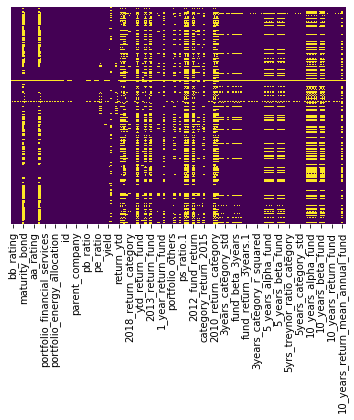

In [1923]:
#Let's reconfirm the understanding with heatmap
sns.heatmap(FundRating.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#From below graph, it is evident that values are missing (indicated by yellow bar)

In [1924]:
# from sklearn.impute import KNNImputer
# nan = np.nan
# # # #>>> X = [[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]
# imputer = KNNImputer(n_neighbors=5, weights="uniform",add_indicator=True)
# imputer.fit_transform(FundRating)

In [1964]:
#Labelling the variable 
cleanup_nums = { "greatstone_rating": {0:"zero", 1:"one" , 2:"two", 3:"three", 4: "four", 5:"five" }
                
               }
#Replacing in the data set
FundRating.replace(cleanup_nums, inplace=True)


In [1965]:
import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, FundRating, y=None):

        self.fill = pd.Series([FundRating[c].value_counts().index[0]
            if FundRating[c].dtype == np.dtype('O') else FundRating[c].median() for c in FundRating],
            index=FundRating.columns)

        return self

    def transform(self, FundRating, y=None):
        return FundRating.fillna(self.fill)
    
    
    #X = pd.DataFrame(data)
#xt = DataFrameImputer().fit_transform(FundRating)


In [1966]:
FundRating = DataFrameImputer().fit_transform(FundRating)


In [1967]:
FundRating.isnull().values.any(), FundRating.isna().values.any(), FundRating.columns[FundRating.isnull().any()]

(False, False, Index([], dtype='object'))

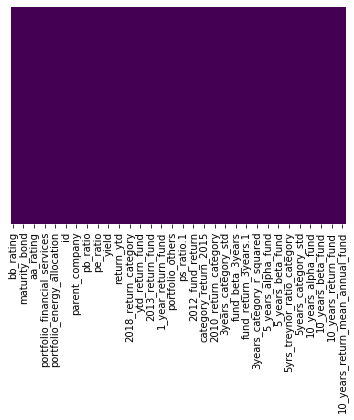

In [1968]:
#Let's reconfirm the understanding with heatmap
sns.heatmap(FundRating.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [1969]:
FundRating1=FundRating
FundRating=FundRating.drop(['mmc','ps_ratio','pc_ratio','pe_ratio','ps_ratio.1','5yrs_treynor_ratio_fund','10yrs_treynor_ratio_fund','3yrs_treynor_ratio_fund','greatstone_rating','fund_size','investment_class','return_ytd','inception_date','fund_id','category','fund_name','currency','id','parent_company'],axis=1)
FundRating=FundRating.replace(",", "")
FundRating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 107 entries, bb_rating to 10_years_return_category
dtypes: float64(107)
memory usage: 20.4 MB


In [1970]:
#Outlier treatment

In [1933]:
#Labelling the variable based on size of the vehicle
cleanup_nums = { "investment_class": {"Blend":1, "Growth":2 ,"Value":3 },
                
                 "fund_size":  {"Small": 1, "Medium": 2 ,"Large":3 }
                
                #"greatstone_rating": {"zero":0, "one":1 , "two":2, "three":3, "four":4, "five":5 }
               }
#Replacing in the data set
FundRating.replace(cleanup_nums, inplace=True)

#FundRating['class'].unique()
#Inference: Labelling and replacement is reflecting successfully

In [1971]:
def replace_outlier(FundRating_in, col_name):
    q1 = FundRating_in[col_name].quantile(0.25)
    q3 = FundRating_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low = (q1)-1.5*iqr
    fence_high = (q3)+1.5*iqr
    median=FundRating[col_name].median()
    FundRating_in[col_name]=np.where((FundRating_in[col_name] < fence_low), median, FundRating_in[col_name])
    FundRating_in[col_name]=np.where((FundRating_in[col_name] > fence_high), median, FundRating_in[col_name])
    #     FundRating_in[col_name]=np.where(FundRating_in.loc[FundRating_in[col_name] > fence_high], FundRating_in[col_name].median(),FundRating_in[col_name])
    
    #FundRating_in[col_name] = np.where((FundRating_in[col_name] > fence_high) | (FundRating_in[col_name] < fence_low), median, FundRating_in[col_name])
    return FundRating_in
    
df_columns = FundRating.columns
for i in range(df_columns.size):
    print(df_columns[i])
    FundRating=replace_outlier(FundRating, df_columns[i])

bb_rating
us_govt_bond_rating
below_b_rating
others_rating
maturity_bond
b_rating
a_rating
aaa_rating
aa_rating
bbb_rating
duration_bond
portfolio_communication_allocation
portfolio_financial_services
portfolio_industrials_allocation
portfolio_tech_allocation
portfolio_materials_basic_allocation
portfolio_energy_allocation
portfolio_consumer_defence_allocation
portfolio_healthcare_allocation
portfolio_property_allocation
portfolio_utils_allocation
portfolio_cyclical_consumer_allocation
fund_ratio_net_annual_expense
pb_ratio
total_assets
yield
2014_category_return
2012_return_category
years_up
2018_return_category
category_return_1year
cash_percent_of_portfolio
2011_return_category
ytd_return_fund
years_down
2014_return_fund
category_return_1month
2013_return_fund
fund_return_3months
ytd_return_category
2017_category_return
1_year_return_fund
2015_return_fund
portfolio_convertable
3_months_return_category
portfolio_others
2016_return_fund
stock_percent_of_portfolio
2016_return_category


In [1972]:
# cleanup_nums = {
#                 "greatstone_rating": {"zero":0, "one":1 , "two":2, "three":3, "four":4, "five":5 }
#                }
# #Replacing in the data set
# FundRating1.replace(cleanup_nums, inplace=True)


In [1973]:
#FundRating=FundRating.drop(['bb_rating','portfolio_utils_allocation','portfolio_cyclical_consumer_allocation','3_years_return_mean_annual_category','3_years_alpha_category'],axis=1)

In [1974]:
#FundRating=FundRating.drop(['us_govt_bond_rating','3years_category_r_squared','3yrs_sharpe_ratio_category','fund_return_3years.1','bbb_rating','10years_category_r_squared'],axis=1)

In [1975]:
#FundRating=FundRating.drop(['10_years_return_category','3yrs_sharpe_ratio_fund','2010_return_category','portfolio_preferred','1_month_fund_return','3years_fund_std','10_years_beta_fund'],axis=1)

In [1976]:
#FundRating=FundRating.drop(['10_years_return_mean_annual_fund','3_years_alpha_fund','bond_percentage_of_porfolio','2017_return_fund','2018_return_fund','10years_category_std','5_years_alpha_fund'],axis=1)

In [1862]:
#FundRating=FundRating.drop(['below_b_rating','5years_fund_r_squared','2017_category_return','3years_fund_r_squared','fund_beta_3years'],axis=1)

In [1863]:
#FundRating=FundRating.drop(['others_rating','category_beta_3years','portfolio_industrials_allocation','3years_category_std','2013_category_return','2014_return_fund','3_years_return_mean_annual_fund'],axis=1)

In [1864]:
#FundRating=FundRating.drop(['10_years_beta_category','category_ratio_net_annual_expense','stock_percent_of_portfolio','b_rating','3_months_return_category','years_down','fund_return_3months'],axis=1)

In [1865]:
#FundRating=FundRating.drop(['maturity_bond','2018_return_category','a_rating','2011_return_fund','2010_return_fund','portfolio_convertable','2013_return_fund','2015_return_fund'],axis=1)

In [1866]:
#FundRating=FundRating.drop(['aaa_rating','duration_bond','portfolio_communication_allocation','10_years_return_mean_annual_category','10yrs_sharpe_ratio_category','portfolio_materials_basic_allocation','ytd_return_fund','2011_return_category','cash_percent_of_portfolio','2012_return_category','5_years_beta_category','years_up'],axis=1)

In [1867]:
#FundRating=FundRating.drop(['category_return_2015','portfolio_tech_allocation','portfolio_energy_allocation','portfolio_property_allocation','portfolio_others','2016_return_fund','fund_return_3years','2012_fund_return','aa_rating'],axis=1)

In [1977]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators=60)
rfcl.fit(x_train, y_train)
rfcl.score(x_train, y_train), rfcl.score(x_cv, y_cv)

(0.9990933333333334, 0.66928)

In [1978]:
## Calculating feature importance
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus
#import graphviz

#xvar = wine_df.drop('quality', axis=1)
feature_cols = FundRating.columns


feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False).tail(35)


,0
category_return_1month,0.000242
fund_ratio_net_annual_expense,0.000171
aaa_rating,0.000109
5yrs_sharpe_ratio_category,0.000000
maturity_bond,0.000000
3years_category_r_squared,0.000000
fund_beta_3years,0.000000
3years_fund_r_squared,0.000000
5yrs_sharpe_ratio_fund,0.000000
3years_fund_std,0.000000


In [1979]:
FundRating=FundRating.drop(['bb_rating','below_b_rating','others_rating','fund_return_3years','2010_return_fund','a_rating','portfolio_cyclical_consumer_allocation','portfolio_utils_allocation','portfolio_property_allocation','portfolio_energy_allocation','portfolio_convertable','us_govt_bond_rating','bbb_rating','2016_return_category','2012_return_category','aaa_rating','portfolio_consumer_defence_allocation','aa_rating','2018_return_category','duration_bond','yield'],axis=1)

In [1892]:
#FundRating=FundRating.drop(['2012_fund_return','category_return_1year','maturity_bond','portfolio_tech_allocation','2011_return_fund','2014_category_return','portfolio_communication_allocation','2013_return_fund','b_rating','2013_return_fund','b_rating','2017_return_fund','pb_ratio','bb_rating','below_b_rating','others_rating','fund_return_3years','2010_return_fund','a_rating','portfolio_cyclical_consumer_allocation','portfolio_utils_allocation','portfolio_property_allocation','portfolio_energy_allocation','portfolio_convertable','us_govt_bond_rating','bbb_rating','2016_return_category','2012_return_category','aaa_rating','portfolio_consumer_defence_allocation','aa_rating','2018_return_category','duration_bond','yield'],axis=1)

In [1980]:
FundRating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 86 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   maturity_bond                         25000 non-null  float64
 1   b_rating                              25000 non-null  float64
 2   portfolio_communication_allocation    25000 non-null  float64
 3   portfolio_financial_services          25000 non-null  float64
 4   portfolio_industrials_allocation      25000 non-null  float64
 5   portfolio_tech_allocation             25000 non-null  float64
 6   portfolio_materials_basic_allocation  25000 non-null  float64
 7   portfolio_healthcare_allocation       25000 non-null  float64
 8   fund_ratio_net_annual_expense         25000 non-null  float64
 9   pb_ratio                              25000 non-null  float64
 10  total_assets                          25000 non-null  float64
 11  2014_category_r

In [1981]:
#Split the data into train and test 
#(Suggestion: specify “random state” if you are using train_test_split from Sklearn)

#Importing required libaries
from sklearn.model_selection import train_test_split
import os

#Drop the target 'class' from data
#x=FundRating.drop('greatstone_rating',axis=1)
x=FundRating
y=FundRating1['greatstone_rating']
# Splitting the dataset into the Training set and Test set
# x_train,x_val,x_test,y_train,y_val,y_test=train_test_split(x,y,train_size=0.50, val_size=0.30, test_size=0.20,random_state=0)
# x_train, x_val, x_test
# y_train,y_val, y_test

In [1870]:
# #Scaling the data
# from scipy.stats import zscore
# #from sklearn.cluster import AgglomerativeClustering 
# x=x.apply(zscore)
# #model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
# #model.fit(x)

In [1982]:
from sklearn.datasets import load_svmlight_files
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,train_size=0.8,random_state=0)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75,random_state=0)
x_train, x_cv,x_test,y_train,y_cv, y_test


(       maturity_bond  b_rating  portfolio_communication_allocation  \
 22331           7.29      0.00                                0.00   
 10962           7.29      0.00                                0.00   
 8422            7.29      0.00                                0.00   
 3081            7.29      0.00                                0.00   
 10287           7.29      1.54                                0.00   
 ...              ...       ...                                 ...   
 13123           7.29      0.00                                2.22   
 19648           7.29      0.00                                4.40   
 9845            7.29      0.02                                0.00   
 10799           7.29      0.42                                0.00   
 2732            7.29      0.00                                0.00   
 
        portfolio_financial_services  portfolio_industrials_allocation  \
 22331                         16.74                             10.99  

In [1983]:
#Do data Scaling/Normalization if required
#This is needed we have variables in different scale ex: scaled_variance.1 etc
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_cv= sc.fit_transform(x_cv)
x_test = sc.fit_transform(x_test)
x=sc.fit_transform(x)
#y=sc.fit_transform(y)


In [1984]:
#Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data

In [1985]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(x_train.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)

Covariance Matrix 
%s [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.00005334 -0.04068354 ... -0.20642631 -0.17928992
  -0.16649457]
 [ 0.         -0.04068354  1.00005334 ...  0.21930349  0.12071272
   0.2281348 ]
 ...
 [ 0.         -0.20642631  0.21930349 ...  1.00005334  0.50646286
   0.7400128 ]
 [ 0.         -0.17928992  0.12071272 ...  0.50646286  1.00005334
   0.60481071]
 [ 0.         -0.16649457  0.2281348  ...  0.7400128   0.60481071
   1.00005334]]
Eigenvectors 
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.04472377 -0.05132251 -0.01360887 ...  0.          0.
   0.        ]
 [ 0.06779982 -0.04843358 -0.2008909  ...  0.          0.
   0.        ]
 ...
 [ 0.17012694  0.13387587  0.00862199 ...  0.          0.
   0.        ]
 [ 0.14419519  0.0146622   0.07612552 ...  0.          0.
   0.        ]
 [ 0.18325069 -0.03786186  0.05833385 ...  0.          0.
   0.        ]]


In [1986]:
print('\nEigenvalues \n%s' %e_vals)


Eigenvalues 
[2.35780751e+01 7.70256108e+00 5.15474827e+00 3.43091584e+00
 2.68757964e+00 2.24118619e+00 1.90105450e+00 1.59320571e+00
 1.54638057e+00 1.38958053e+00 1.26003278e+00 1.17962667e+00
 1.05015683e+00 1.05949161e+00 9.78291788e-01 9.61638605e-01
 9.35326595e-01 9.18469591e-01 9.04272197e-01 8.75522585e-01
 8.29320328e-01 7.95502440e-01 7.85289282e-01 7.52966791e-01
 7.27897537e-01 7.00109534e-01 6.77125465e-01 6.23239740e-01
 6.14028626e-01 6.00846864e-01 5.53179623e-01 5.32133618e-01
 4.92906025e-01 4.85605725e-01 4.72091404e-01 4.58036904e-01
 4.35301897e-01 4.29509777e-01 4.10590324e-01 1.01913824e-02
 2.86455271e-02 2.27483460e-02 2.13564357e-02 4.47841998e-02
 5.11695988e-02 5.30134858e-02 5.50886864e-02 3.88443284e-01
 3.85966509e-01 6.99880664e-02 8.08381919e-02 6.20031468e-02
 9.03275912e-02 3.68051884e-01 9.86421381e-02 1.04234166e-01
 1.15307821e-01 1.28834961e-01 3.45643724e-01 2.99639941e-01
 2.79076094e-01 2.89530716e-01 2.62164970e-01 1.36162709e-01
 2.4345975

In [1987]:
# "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 29.47102204  39.09870988  45.54180156  49.83021763  53.18951302
  55.99084634  58.36703773  60.35843866  62.29131128  64.0281943
  65.60315127  67.07760596  68.40189984  69.71452586  70.93732537
  72.13930952  73.30840541  74.45643117  75.58671113  76.68105599
  77.71765111  78.71197613  79.69353538  80.63469367  81.54451707
  82.41960731  83.265969    84.04497713  84.81247197  85.5634905
  86.25492815  86.92005969  87.53615936  88.14313415  88.73321693
  89.30573252  89.84983087  90.38668946  90.89989999  91.3854282
  91.86786061  92.32790093  92.75993254  93.184924    93.60576343
  94.0238026   94.42654984  94.80107979  95.16297388  95.51180039
  95.83948913  96.14379758  96.43752832  96.72880239  96.99153212
  97.24355426  97.48420136  97.71260604  97.93316149  98.14148224
  98.34327482  98.53340765  98.70360196  98.86463708  99.00876417
  99.13904992  99.26234602  99.37524949  99.47629184  99.56377226
  99.64127206  99.71012924  99.77639256  99.84035

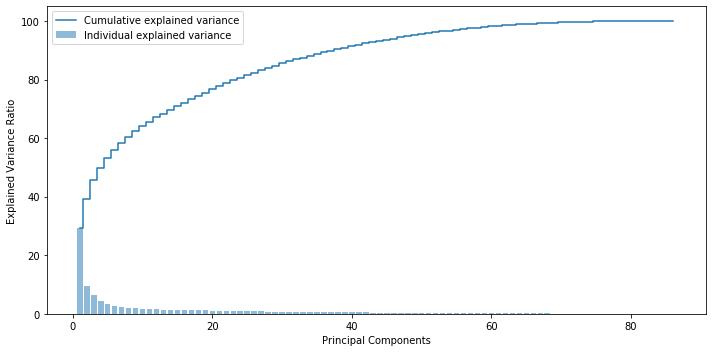

In [1988]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()


In [1989]:
#Proceeding with 70 components
pca_new = PCA(n_components=65)
#Fitting PCA into train data
pca_new.fit(x_train)
#Fitting PCA into test data
pca_new.fit(x_cv)
pca_new.fit(x_test)
pca_new.fit(x)
print(pca_new.components_)
print(pca_new.explained_variance_ratio_)
Xpca_train_new = pca_new.transform(x_train)
Xpca_cv_new = pca_new.transform(x_cv)
Xpca_test_new = pca_new.transform(x_test)
xpca=pca_new.transform(x)


[[ 0.00000000e+00 -4.52908153e-02  6.75224854e-02 ...  1.69770416e-01
   1.44440866e-01  1.83196436e-01]
 [-1.73472348e-17 -5.22840669e-02 -4.92890561e-02 ...  1.33404236e-01
   1.63365939e-02 -3.68574012e-02]
 [ 8.57603918e-17 -1.49370063e-02 -2.01031544e-01 ...  9.68386519e-03
   7.37589667e-02  5.75080822e-02]
 ...
 [-2.03458727e-16  5.69788704e-03 -7.23506997e-02 ... -5.10340609e-02
   3.21452059e-02 -1.93903344e-01]
 [-2.69739197e-16  1.65135933e-02 -1.67012272e-02 ... -5.90491670e-02
   1.30588065e-01 -4.74748013e-02]
 [ 6.42235202e-17 -2.08273116e-03  2.08663709e-02 ...  2.62758745e-02
   1.06737488e-01  2.01843388e-01]]
[0.29498075 0.09658941 0.06405101 0.04273881 0.03343674 0.02810293
 0.02363665 0.01980979 0.01933014 0.01741533 0.01571883 0.01464561
 0.01338333 0.0130832  0.01225032 0.0120328  0.01168943 0.0114577
 0.01131767 0.01093038 0.01034022 0.00998376 0.00980959 0.00942078
 0.00910622 0.00873371 0.0084543  0.00781015 0.00769801 0.00759257
 0.0068989  0.00666625 0.00620

In [1879]:
# from sklearn.svm import SVC
# svc = SVC(C=10,gamma=0.0065)

In [1990]:
#Before PCA-SVC
from sklearn.svm import SVC
svc = SVC(C=8,gamma=0.0116)
svc.fit(x_train, y_train)
svc.score(x_train, y_train), svc.score(x_cv, y_cv)

(0.8298666666666666, 0.66832)

In [1991]:
svc.score(x_test, y_test)

0.6674

In [1290]:
greatstone_rating=svc.predict(x_test)

In [1291]:
greatstone_rating

array([3, 3, 4, ..., 4, 3, 3])

In [1292]:
greatstone_rating1 = svc.predict(x)

In [1293]:
greatstone_rating1

array([3, 3, 3, ..., 0, 0, 0])

In [785]:
greatstone_rating1 = pd.DataFrame(greatstone_rating1, columns=['greatstone_rating']).to_csv('submissionSVC9.csv')
#FundRating1=pd.DataFrame(FundRating1, columns=['fund_id']).to_csv('submissionSVC4.csv')

In [ ]:
greatstone_rating = pd.DataFrame(greatstone_rating, columns=['greatstone_rating']).to_csv('submissionSVC.csv')

In [1952]:
#Decision classifier
from sklearn.tree import DecisionTreeClassifier
model_entropy=DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(x_train, y_train)
model_entropy.score(x_train, y_train), model_entropy.score(x_cv, y_cv)

(0.9991466666666666, 0.57024)

In [1953]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=50, min_samples_leaf=80)
clf_pruned.fit(x_train, y_train)
clf_pruned.score(x_train, y_train),clf_pruned.score(x_cv, y_cv)

(0.6048533333333334, 0.5376)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [ ]:
#X_poly = poly.fit_transform(X_scaled)

In [ ]:
x_train_poly = poly.fit_transform(x_train)
x_cv_poly = poly.fit_transform(x_cv)
x_test_poly = poly.fit_transform(x_test)
x_poly=poly.fit_transform(x)

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(x_train_poly, y_train)
lasso.score(x_train_poly, y_train), lasso.score(x_cv_poly, y_cv)

In [ ]:
lasso.score(x_test_poly, y_test)

In [ ]:
from sklearn.svm import SVR
svr=SVR(C=10,gamma=0.006)
svr.fit(x_train_poly, y_train)
svr.score(x_train_poly, y_train), svr.score(x_cv_poly, y_cv)

In [ ]:
svr.score(x_test_poly, y_test)

In [1241]:
#After PCA-SVC
svc=SVC(C=10,gamma=0.0065)
svc.fit(Xpca_train_new, y_train)
svc.score(Xpca_train_new, y_train), svc.score(Xpca_cv_new, y_cv)

(0.7762133333333333, 0.66608)

In [1242]:
svc.score(Xpca_test_new, y_test)

0.6658

In [ ]:
greatstone_rating = svc.predict(x)

In [ ]:
print (greatstone_rating)

In [ ]:
greatstone_rating = pd.DataFrame(greatstone_rating, columns=['greatstone_rating']).to_csv('sample_submission.csv')

In [1992]:
from sklearn.ensemble import RandomForestClassifier
#rfcl = RandomForestClassifier(n_estimators=55, bootstrap= False, criterion= 'entropy', max_depth= None, max_features=44, min_samples_leaf= 6, min_samples_split= 17)
rfcl = RandomForestClassifier(n_estimators=53, bootstrap= False, criterion= 'entropy', max_depth= None, max_features=41, min_samples_leaf= 7, min_samples_split= 12)
rfcl.fit(x_train, y_train)
rfcl.score(x_train, y_train), rfcl.score(x_cv, y_cv)


(0.9456, 0.65504)

In [1955]:
rfcl.score(x_test, y_test)

0.656

In [1906]:
rfcl = RandomForestClassifier(n_estimators=53, bootstrap= False, criterion= 'entropy', max_depth= None, max_features=37, min_samples_leaf= 6, min_samples_split= 10)
rfcl.fit(x_train, y_train)
rfcl.score(x_train, y_train), rfcl.score(x_cv, y_cv)

(0.9594133333333333, 0.67952)

In [1907]:
rfcl.score(x_test, y_test)

0.6804

In [ ]:
 Best cross-validation accuracy: 0.68
 Best parameters:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 37, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 53}
 Test set accuracy: 0.70

In [ ]:
#bootstrap=False, criterion=entropy, max_depth=None, max_features=37, min_samples_leaf=6, min_samples_split=10, n_estimators=53, score=0.680, total=  26.4s
#  Best parameters:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 42, 'min_samples_leaf': 8, 'min_samples_split': 11, 'n_estimators': 64}
#          bootstrap=False, criterion=entropy, max_depth=None, max_features=41, min_samples_leaf=8, min_samples_split=13, n_estimators=55, score=0.680

In [ ]:
# rfcl = RandomForestClassifier(n_estimators=53, bootstrap= False, criterion= 'entropy', max_depth= None, max_features=41, min_samples_leaf= 7, min_samples_split= 12)
 #   Accuracy:70.2
    #Best cross-validation accuracy: 0.67
    
 #Best parameters:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 41, 'min_samples_leaf': 7, 'min_samples_split': 12, 'n_estimators': 53}


In [1681]:
greatstone_rating = rfcl.predict(x)

In [1682]:
greatstone_rating = pd.DataFrame(greatstone_rating, columns=['greatstone_rating']).to_csv('sample_submissionRFCL15.csv')

In [1060]:
#Bagging
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=55)
bgcl.fit(x_train, y_train)
bgcl.score(x_train, y_train), bgcl.score(x_cv, y_cv)

(0.99904, 0.63344)

In [1061]:
#Gradient booster
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 55)
gbcl.fit(x_train, y_train)
gbcl.score(x_train, y_train), gbcl.score(x_cv, y_cv)

(0.6258666666666667, 0.54784)

In [548]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl.fit(x_train, y_train)
abcl.score(x_train, y_train), gbcl.score(x_cv, y_cv)

(0.50432, 0.54112)

In [1062]:
#After PCA
rfcl.fit(Xpca_train_new, y_train)
rfcl.score(Xpca_train_new, y_train), rfcl.score(Xpca_cv_new, y_cv)

(0.9990933333333334, 0.612)

In [ ]:
#Hyperparameter Tuning

In [1956]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [1957]:
param_dist = {"n_estimators":sp_randint(53,63),
              "max_depth":[None],
              "max_features": sp_randint(35,45),
              "min_samples_split":sp_randint(10,20),
              "min_samples_leaf":sp_randint(5,10),
              "bootstrap": [True, False],
              "criterion": [ "entropy"]}

param_grid = {"C":[10],
              "gamma":sp_randint(0.001,0.06), 
              "kernel":['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
             } 


In [1685]:
# run randomized search
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(rfcl, param_distributions=param_dist,n_iter=samples,verbose=10) #default cv = 3

In [1686]:
randomCV.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=42, min_samples_leaf=6, min_samples_split=14, n_estimators=62 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=42, min_samples_leaf=6, min_samples_split=14, n_estimators=62, score=0.668, total=  33.3s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=42, min_samples_leaf=6, min_samples_split=14, n_estimators=62 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.3s remaining:    0.0s


[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=42, min_samples_leaf=6, min_samples_split=14, n_estimators=62, score=0.677, total=  28.1s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=42, min_samples_leaf=6, min_samples_split=14, n_estimators=62 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.0min remaining:    0.0s


[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=42, min_samples_leaf=6, min_samples_split=14, n_estimators=62, score=0.679, total=  27.8s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=42, min_samples_leaf=6, min_samples_split=14, n_estimators=62 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.5min remaining:    0.0s


[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=42, min_samples_leaf=6, min_samples_split=14, n_estimators=62, score=0.675, total=  30.0s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=42, min_samples_leaf=6, min_samples_split=14, n_estimators=62 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.0min remaining:    0.0s


[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=42, min_samples_leaf=6, min_samples_split=14, n_estimators=62, score=0.673, total=  28.9s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=40, min_samples_leaf=7, min_samples_split=12, n_estimators=57 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.5min remaining:    0.0s


[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=40, min_samples_leaf=7, min_samples_split=12, n_estimators=57, score=0.672, total=  27.2s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=40, min_samples_leaf=7, min_samples_split=12, n_estimators=57 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.9min remaining:    0.0s


[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=40, min_samples_leaf=7, min_samples_split=12, n_estimators=57, score=0.669, total=  25.8s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=40, min_samples_leaf=7, min_samples_split=12, n_estimators=57 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  3.4min remaining:    0.0s


[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=40, min_samples_leaf=7, min_samples_split=12, n_estimators=57, score=0.677, total=  26.4s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=40, min_samples_leaf=7, min_samples_split=12, n_estimators=57 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  3.8min remaining:    0.0s


[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=40, min_samples_leaf=7, min_samples_split=12, n_estimators=57, score=0.678, total=  24.1s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=40, min_samples_leaf=7, min_samples_split=12, n_estimators=57 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  4.2min remaining:    0.0s


[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=40, min_samples_leaf=7, min_samples_split=12, n_estimators=57, score=0.668, total=  23.8s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=35, min_samples_leaf=6, min_samples_split=18, n_estimators=61 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=35, min_samples_leaf=6, min_samples_split=18, n_estimators=61, score=0.664, total=  15.0s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=35, min_samples_leaf=6, min_samples_split=18, n_estimators=61 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=35, min_samples_leaf=6, min_samples_split=18, n_estimators=61, score=0.659, total=  15.3s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=35, min_samples_leaf=6, min_samples_split=18, n_estimators=61 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=35, min_samples_leaf=6, min_samples_split=18, n_estim

[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=37, min_samples_leaf=6, min_samples_split=10, n_estimators=53, score=0.677, total=  22.1s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=37, min_samples_leaf=6, min_samples_split=10, n_estimators=53 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=37, min_samples_leaf=6, min_samples_split=10, n_estimators=53, score=0.677, total=  24.9s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=37, min_samples_leaf=6, min_samples_split=10, n_estimators=53 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=37, min_samples_leaf=6, min_samples_split=10, n_estimators=53, score=0.673, total=  21.3s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=39, min_samples_leaf=9, min_samples_split=12, n_estimators=61 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=39, min_samples_leaf=9, min_samples_split=12, n_e

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 18.4min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=False,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=None,
                                                    max_features=41,
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=7,
                                                    min_samples_split=12,
                                                    min_weight_fraction_leaf=0.0,
           

In [1688]:
print(" Best cross-validation accuracy: {:.2f}". format( randomCV.best_score_)) 
print(" Best parameters: ", randomCV.best_params_) 
print(" Test set accuracy: {:.2f}". format( randomCV.score( x_cv, y_cv)))

 Best cross-validation accuracy: 0.68
 Best parameters:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 37, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 53}
 Test set accuracy: 0.70


In [ ]:
from sklearn.model_selection import GridSearchCV
#pipe_svc = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('svc', SVC())]) 
pipe_svc = Pipeline([('scl', StandardScaler()),('rfcl', RandomForestClassifier())]) 
#param_grid = {'pca__n_components':[65],'svc__C': [0.001, 0.01, 0.1, 1,5,6,7,8,9,10], 'svc__gamma': [0.001,0.01,0.06,0.5,0.1,1,2,3,4,10], 'svc__kernel':['rbf','poly']} 

param_grid = {'svc__C': [10,],
              'svc__gamma': [0.05,0.06,0.07,], 
              'svc__kernel':['rbf']
             } 

grid = GridSearchCV( pipe_svc , param_grid = param_grid, cv = 5,verbose=10) 

grid.fit( x_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid.best_score_)) 
print(" Best parameters: ", grid.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid.score( x_cv, y_cv)))